# **CAPSTONE MODUL 2**

## **Latar Belakang**

Perusahaan NYC TLC (New York City Taxi and Limousine Commission) merupakan agensi dari pemerintahan New York City yang memberikan perizinan dan regulasi tentang sistem taxi di New york, termasuk taxi online. NYC TLC ingin menganalisis data dari vendor yang ada, yaitu Creative Mobile dan VeriFone.

## **Pernyataan Masalah**

Perusahaan ingin melakukan analisis puncak pemesanan taxi pada hari/ jam berapa. Hal ini dilakukan untuk mengetahui rekomedasi pengerahan armada ke lokasi tertentu dan pada jam tertentu. Perusahaan juga ingin mengetahui kepuasan customer terhadap service.

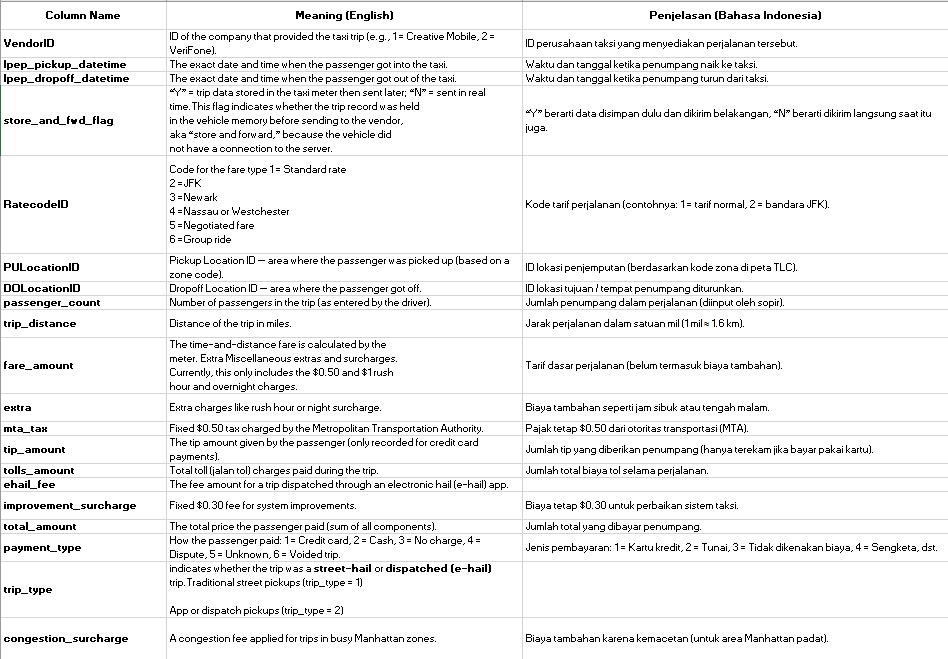

## **Data Cleaning**

In [239]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms

In [240]:
pd.set_option('display.max_columns', 100)

base_dir = "D:\\Purwadhika\\Syntax Files\\CAPSTONE\\MODUL 2\\"
path = base_dir + "NYC TLC Trip Record.csv"

df = pd.read_csv(path)
df.head()

C:\Users\Hp\AppData\Local\Temp\ipykernel_29200\1006455892.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [241]:
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [243]:
# melihat data unik di setiap kolom
pd.set_option('display.max_colwidth', 1)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

In [244]:
df.duplicated().sum()

np.int64(0)

- tidak ada data duplikat

<Axes: >

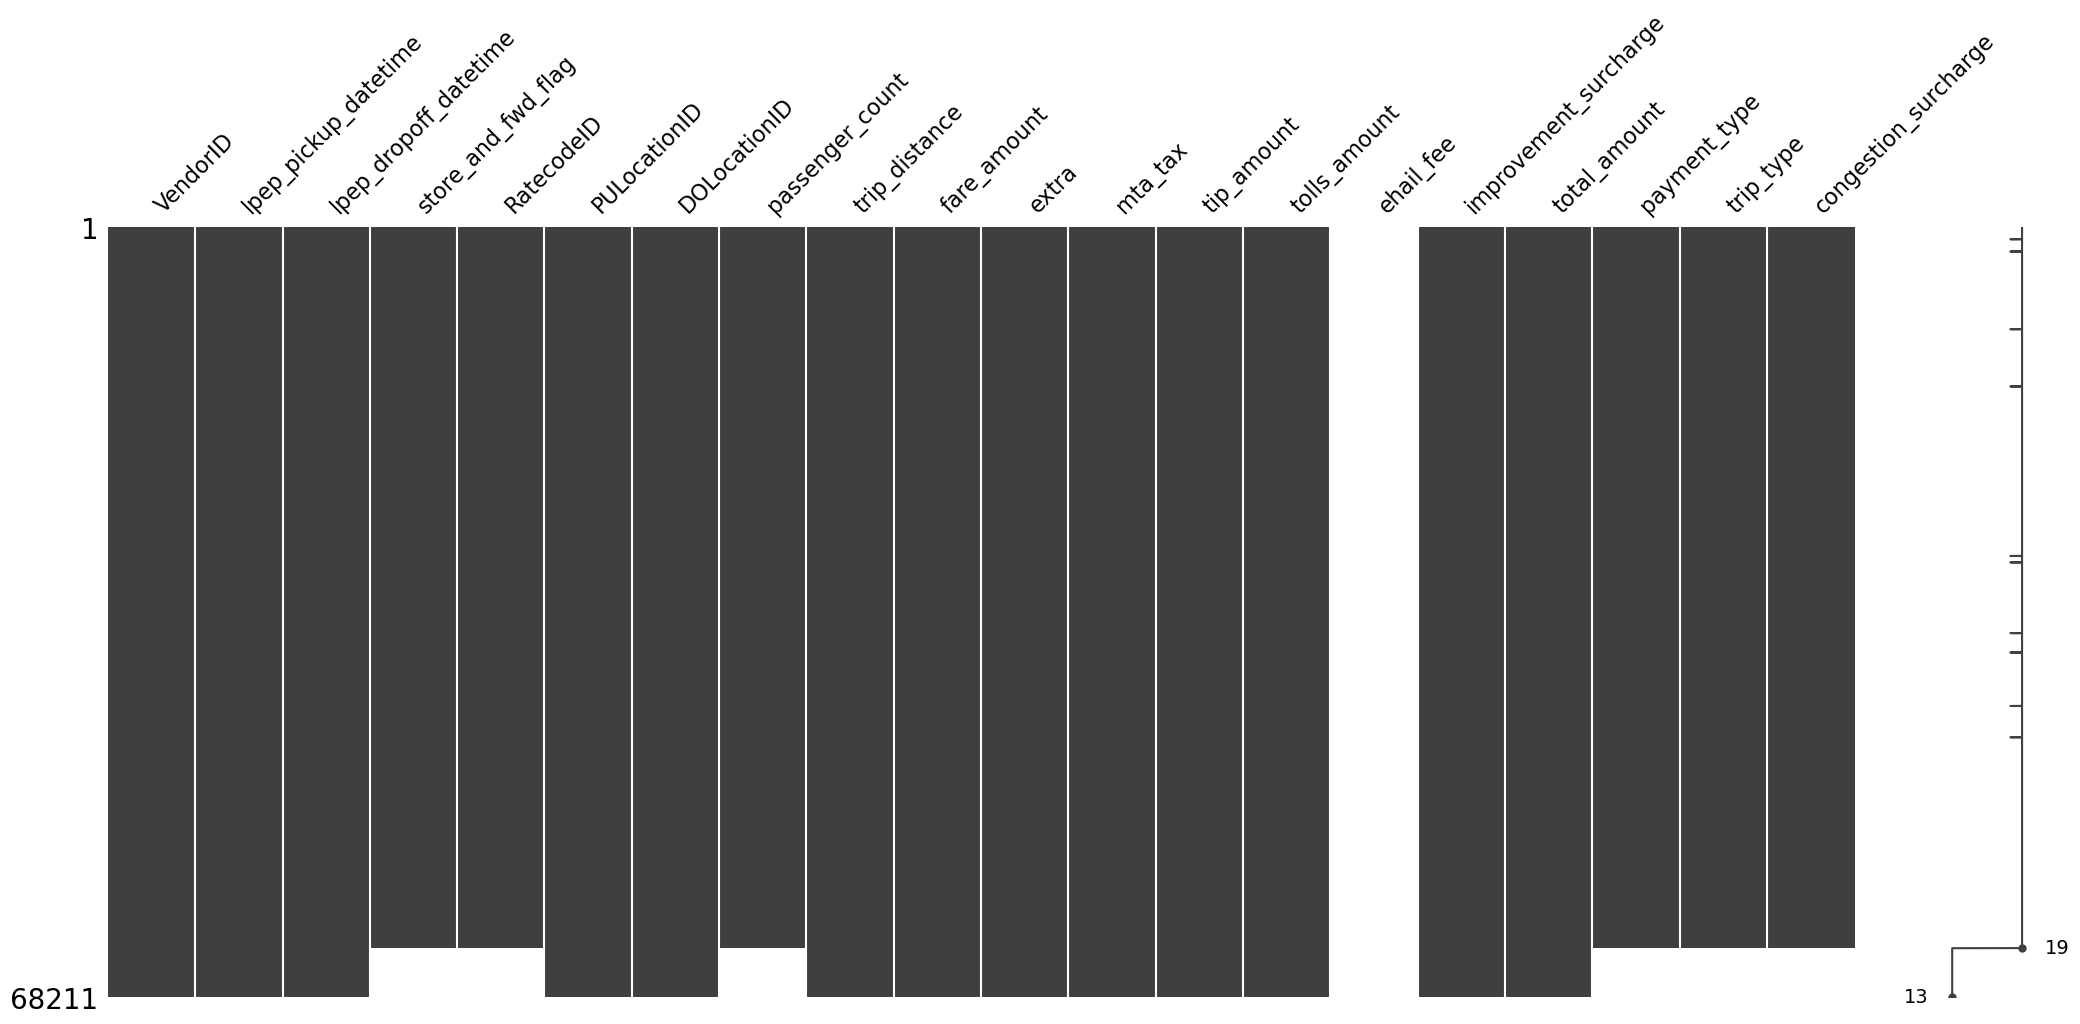

In [245]:
#melihat persebaran data kosong
ms.matrix(df)

In [246]:
df[df.isna().any(axis = 1)].head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [247]:
#melihat berapa persen data yg hilang di tiap kolom
df.isna().sum()/df.shape[0]*100

VendorID                 0.000000  
lpep_pickup_datetime     0.000000  
lpep_dropoff_datetime    0.000000  
store_and_fwd_flag       6.339154  
RatecodeID               6.339154  
PULocationID             0.000000  
DOLocationID             0.000000  
passenger_count          6.339154  
trip_distance            0.000000  
fare_amount              0.000000  
extra                    0.000000  
mta_tax                  0.000000  
tip_amount               0.000000  
tolls_amount             0.000000  
ehail_fee                100.000000
improvement_surcharge    0.000000  
total_amount             0.000000  
payment_type             6.339154  
trip_type                6.353814  
congestion_surcharge     6.339154  
dtype: float64

Dengan data understanding, dapat dilihat bahwa:
- kolom `ehail_fee` tidak memiliki nilai, sehingga boleh di drop
- kolom `RatecodeID` memiliki row dengan nilai 99.0 yang tidak termasuk klasifikasi apapun, bisa dianggap unknown aja
- kolom `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`,`trip_type`,`congestion_surcharge` memiliki nilai Nan.
- kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` memiliki data type object, sehingga harus diubah terlebih dahulu menjadi type date_and_time untuk memudahkan analisis berdasarkan waktu
- kolom `total_amount` merupakan hasil penambahan dari kolom `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `tols_amount`, `improvement_surcharge`, dan `congestion_surcharge`
- jika `fare_amount` bernilai negatif, artinya terjadi refund (bisa diexclude untuk analisis) 
- `PULocation` dan `DOLocation` merupakan ID lokasi, cari tau apa artinya


### 1. Drop Kolom ehail_fee

In [248]:
#ehail_fee tidak memiliki data yang berguna untuk analisis dan nilainya NaN semua
df.drop(columns = "ehail_fee", inplace = True)

### 2. Impute Data dengan Value NaN 

#### 2.1 store_and_fwd_flag

In [249]:
df["store_and_fwd_flag"].mode() #nilai null diisi dengan N karna 1. modusnya N 2. Asumsi driver masih menyimpan data dan belum dikirim

0    N
Name: store_and_fwd_flag, dtype: object

In [250]:
df["store_and_fwd_flag"] = df["store_and_fwd_flag"].fillna(df["store_and_fwd_flag"].mode()[0])

In [251]:
df["store_and_fwd_flag"].isna().sum()

np.int64(0)

#### 2.2 RatecodeID

In [252]:
#karena tadi RatecodeID 99 dianggap unknown, maka nilai Nan diisi 99 saja
df["RatecodeID"] = df["RatecodeID"].fillna(99)

In [253]:
df["RatecodeID"].isna().sum()

np.int64(0)

#### 2.3 Passenger Count

In [254]:
df["passenger_count"].mean() #dianggap rata_rata penumpang yang belum diinput = 1

np.float64(1.3158702083365943)

In [255]:
df["passenger_count"] = df["passenger_count"].fillna(1)

In [256]:
df["passenger_count"].mean()

np.float64(1.2958467109410505)

In [257]:
df["passenger_count"].isna().sum()

np.int64(0)

#### 2.4 payment_type, trip_type

In [258]:
df["payment_type"] = df["payment_type"].fillna(99)
df["trip_type"] = df["trip_type"].fillna(99)

#### 2.5 congestion surcharge

In [259]:
df[df['congestion_surcharge'].isna()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,N,99.0,7,17,1.0,9.33,36.03,0.0,0.0,7.41,0.0,1.0,44.44,99.0,99.0,NaN
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,N,99.0,37,37,1.0,2.67,14.55,0.0,0.0,3.11,0.0,1.0,18.66,99.0,99.0,NaN
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,N,99.0,80,7,1.0,7.39,32.13,0.0,0.0,6.63,0.0,1.0,39.76,99.0,99.0,NaN
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,N,99.0,169,42,1.0,4.04,17.85,0.0,0.0,0.00,0.0,1.0,18.85,99.0,99.0,NaN
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,N,99.0,42,262,1.0,3.86,19.67,0.0,0.0,4.68,0.0,1.0,28.10,99.0,99.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,99.0,49,62,1.0,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,99.0,99.0,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,99.0,10,205,1.0,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,99.0,99.0,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,99.0,66,37,1.0,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,99.0,99.0,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,99.0,225,189,1.0,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,99.0,99.0,NaN


- jika dilakukan perhitungan dengan melakukan pengurangan dari total amount dengan fee lainnya, maka dapat disimpulkan congestion_surcharge yang bernila NaN = 0

In [260]:
df["congestion_surcharge"] = df["congestion_surcharge"].fillna(0)

In [261]:
df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

### 3. Mengubah format data pickup dan dropoff datetime

In [262]:
df['lpep_pickup_datetime'].str[0:4].unique()

array(['2023', '2022', '2009'], dtype=object)

In [263]:
df.groupby(df['lpep_pickup_datetime'].str[0:4]).size()

lpep_pickup_datetime
2009    1    
2022    2    
2023    68208
dtype: int64

ternyata ada data dari tahun 2009 dan 2002 yang banyaknya tidak signifikan untuk dianalisis sehingga lebih baik dibuang

In [264]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [265]:
df = df[df['lpep_pickup_datetime'].dt.year == 2023]

In [266]:
df['lpep_pickup_datetime'].dt.year.unique()

array([2023], dtype=int32)

In [267]:
df['lpep_dropoff_datetime'].dt.year.unique()

array([2023], dtype=int32)

tahun data sudah dibersihkan hanya pada tahun 2023, sekarang kita lihat bulannya

In [268]:
df['lpep_pickup_datetime'].dt.month.unique()

array([1, 2], dtype=int32)

In [269]:
df.groupby(df['lpep_pickup_datetime'].dt.month).size()

lpep_pickup_datetime
1    68207
2    1    
dtype: int64

ternyata ada data bulan Februari yang tidak signifikan untuk dianalisis karna hanya 1 data, sehingga dapat di drop saja

In [270]:
df = df[df['lpep_pickup_datetime'].dt.month == 1]

In [271]:
df['lpep_pickup_datetime'].dt.month.unique()

array([1], dtype=int32)

In [272]:
df['lpep_dropoff_datetime'].dt.month.unique()

array([1, 2], dtype=int32)

In [273]:
df.groupby(df['lpep_dropoff_datetime'].dt.month).size()

lpep_dropoff_datetime
1    68192
2    15   
dtype: int64

In [274]:
df[df['lpep_dropoff_datetime'].dt.month == 2]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
61992,2,2023-01-31 08:46:26,2023-02-01 07:34:55,N,1.0,116,161,1.0,5.66,32.40,0.0,0.5,5.50,0.0,1.0,42.15,1.0,1.0,2.75
62120,2,2023-01-31 09:02:52,2023-02-01 09:01:47,N,1.0,41,42,1.0,0.87,7.90,0.0,0.5,0.00,0.0,1.0,9.40,1.0,1.0,0.00
62148,2,2023-01-31 09:53:33,2023-02-01 00:00:00,N,1.0,7,226,1.0,1.35,9.30,0.0,0.5,0.00,0.0,1.0,10.80,2.0,1.0,0.00
62510,2,2023-01-31 12:41:35,2023-02-01 12:05:19,N,1.0,75,42,1.0,2.17,12.80,0.0,0.5,0.00,0.0,1.0,14.30,2.0,1.0,0.00
62591,2,2023-01-31 13:58:22,2023-02-01 11:46:10,N,1.0,130,130,1.0,0.10,3.70,0.0,0.5,0.00,0.0,1.0,5.20,2.0,1.0,0.00
62653,2,2023-01-31 13:57:30,2023-02-01 10:49:04,N,1.0,244,43,3.0,5.74,31.00,0.0,0.5,0.00,0.0,0.3,34.55,1.0,1.0,2.75
62762,2,2023-01-31 15:21:47,2023-02-01 00:00:00,N,1.0,92,64,2.0,9.15,39.40,0.0,0.5,4.09,0.0,1.0,44.99,1.0,1.0,0.00
63105,2,2023-01-31 17:45:46,2023-02-01 17:27:05,N,1.0,43,151,1.0,0.75,5.80,2.5,0.5,2.45,0.0,1.0,12.25,1.0,1.0,0.00
63279,2,2023-01-31 18:22:24,2023-02-01 00:00:00,N,1.0,82,82,1.0,1.46,10.70,2.5,0.5,0.00,0.0,1.0,14.70,2.0,1.0,0.00
63462,2,2023-01-31 19:40:22,2023-02-01 00:00:00,N,1.0,226,173,1.0,2.94,14.90,2.5,0.5,0.00,0.0,1.0,18.90,2.0,1.0,0.00


untuk waktu dropoff yang terjadi di bulan februari dibiarin saja karna merupakan bagian dari trip yang diambil pada tanggal 31 januari

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68207 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68207 non-null  int64         
 1   lpep_pickup_datetime   68207 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68207 non-null  datetime64[ns]
 3   store_and_fwd_flag     68207 non-null  object        
 4   RatecodeID             68207 non-null  float64       
 5   PULocationID           68207 non-null  int64         
 6   DOLocationID           68207 non-null  int64         
 7   passenger_count        68207 non-null  float64       
 8   trip_distance          68207 non-null  float64       
 9   fare_amount            68207 non-null  float64       
 10  extra                  68207 non-null  float64       
 11  mta_tax                68207 non-null  float64       
 12  tip_amount             68207 non-null  float64       
 13  tolls_

### 4. PULocation dan DOLocation

data didapat dari https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [276]:
pd.set_option('display.max_columns', 100)

base_dir = "D:\\Purwadhika\\Syntax Files\\CAPSTONE\\MODUL 2\\"
path = base_dir + "taxi_zone_lookup.csv"

df_map = pd.read_csv(path)
df_map

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN


In [277]:
df_map.isna().sum()

LocationID      0
Borough         1
Zone            1
service_zone    2
dtype: int64

In [278]:
df_map[df_map.isna().any(axis=1)]

,LocationID,Borough,Zone,service_zone
263,264,Unknown,NaN,NaN
264,265,NaN,Outside of NYC,NaN


In [279]:
#isi dengan unknown karena data tidak diketahui
df_map = df_map.fillna('Unknown')

In [280]:
#Cek kewarasan apakah data sudah terisi
df_map.iloc[263:265]

,LocationID,Borough,Zone,service_zone
263,264,Unknown,Unknown,Unknown
264,265,Unknown,Outside of NYC,Unknown


In [281]:
df = pd.merge(df, df_map, left_on = "PULocationID", right_on = "LocationID")
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,LocationID,Borough,Zone,service_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,166,Manhattan,Morningside Heights,Boro Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,24,Manhattan,Bloomingdale,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,223,Queens,Steinway,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,41,Manhattan,Central Harlem,Boro Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,41,Manhattan,Central Harlem,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68202,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,99.0,49,62,1.0,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,99.0,99.0,0.00,49,Brooklyn,Clinton Hill,Boro Zone
68203,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,99.0,10,205,1.0,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,99.0,99.0,0.00,10,Queens,Baisley Park,Boro Zone
68204,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,99.0,66,37,1.0,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,99.0,99.0,0.00,66,Brooklyn,DUMBO/Vinegar Hill,Boro Zone
68205,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,99.0,225,189,1.0,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,99.0,99.0,0.00,225,Brooklyn,Stuyvesant Heights,Boro Zone


In [282]:
df.drop(columns = "LocationID", inplace = True)
df.rename(columns = {"Borough" : "PUBorough", "Zone" : "PUZone", "service_zone" : "PUservice_zone" }, inplace = True)

In [283]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68202,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,99.0,49,62,1.0,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,99.0,99.0,0.00,Brooklyn,Clinton Hill,Boro Zone
68203,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,99.0,10,205,1.0,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,99.0,99.0,0.00,Queens,Baisley Park,Boro Zone
68204,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,99.0,66,37,1.0,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,99.0,99.0,0.00,Brooklyn,DUMBO/Vinegar Hill,Boro Zone
68205,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,99.0,225,189,1.0,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,99.0,99.0,0.00,Brooklyn,Stuyvesant Heights,Boro Zone


In [284]:
df = pd.merge(df, df_map, left_on = "DOLocationID", right_on = "LocationID")
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,LocationID,Borough,Zone,service_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,143,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,43,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,179,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,238,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,74,Manhattan,East Harlem North,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68202,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,99.0,49,62,1.0,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,99.0,99.0,0.00,Brooklyn,Clinton Hill,Boro Zone,62,Brooklyn,Crown Heights South,Boro Zone
68203,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,99.0,10,205,1.0,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,99.0,99.0,0.00,Queens,Baisley Park,Boro Zone,205,Queens,Saint Albans,Boro Zone
68204,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,99.0,66,37,1.0,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,99.0,99.0,0.00,Brooklyn,DUMBO/Vinegar Hill,Boro Zone,37,Brooklyn,Bushwick South,Boro Zone
68205,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,99.0,225,189,1.0,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,99.0,99.0,0.00,Brooklyn,Stuyvesant Heights,Boro Zone,189,Brooklyn,Prospect Heights,Boro Zone


In [285]:
df.drop(columns = "LocationID", inplace = True)
df.rename(columns = {"Borough" : "DOBorough", "Zone" : "DOZone", "service_zone" : "DOservice_zone" }, inplace = True)

In [286]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68202,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,99.0,49,62,1.0,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,99.0,99.0,0.00,Brooklyn,Clinton Hill,Boro Zone,Brooklyn,Crown Heights South,Boro Zone
68203,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,99.0,10,205,1.0,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,99.0,99.0,0.00,Queens,Baisley Park,Boro Zone,Queens,Saint Albans,Boro Zone
68204,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,99.0,66,37,1.0,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,99.0,99.0,0.00,Brooklyn,DUMBO/Vinegar Hill,Boro Zone,Brooklyn,Bushwick South,Boro Zone
68205,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,99.0,225,189,1.0,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,99.0,99.0,0.00,Brooklyn,Stuyvesant Heights,Boro Zone,Brooklyn,Prospect Heights,Boro Zone


### 5. Menghapus Data Outliers Berdasarkan Pemahaman Bisnis

#### 5.1 Trip_distance

<Axes: xlabel='trip_distance', ylabel='Count'>

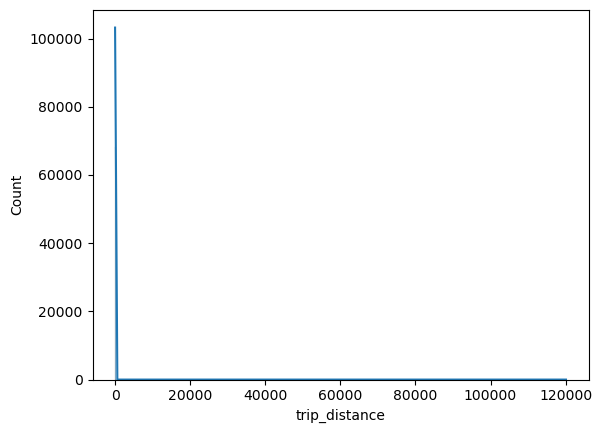

In [287]:
sns.histplot(data = df, x = "trip_distance", kde = True, bins = 500)

In [288]:
df["trip_distance"].skew() #sangat ke kanan

np.float64(162.94270701421058)

In [289]:
df["trip_distance"].kurtosis()+3 #sangat terbesar karna dipengaruhi outlier

np.float64(29732.047756484513)

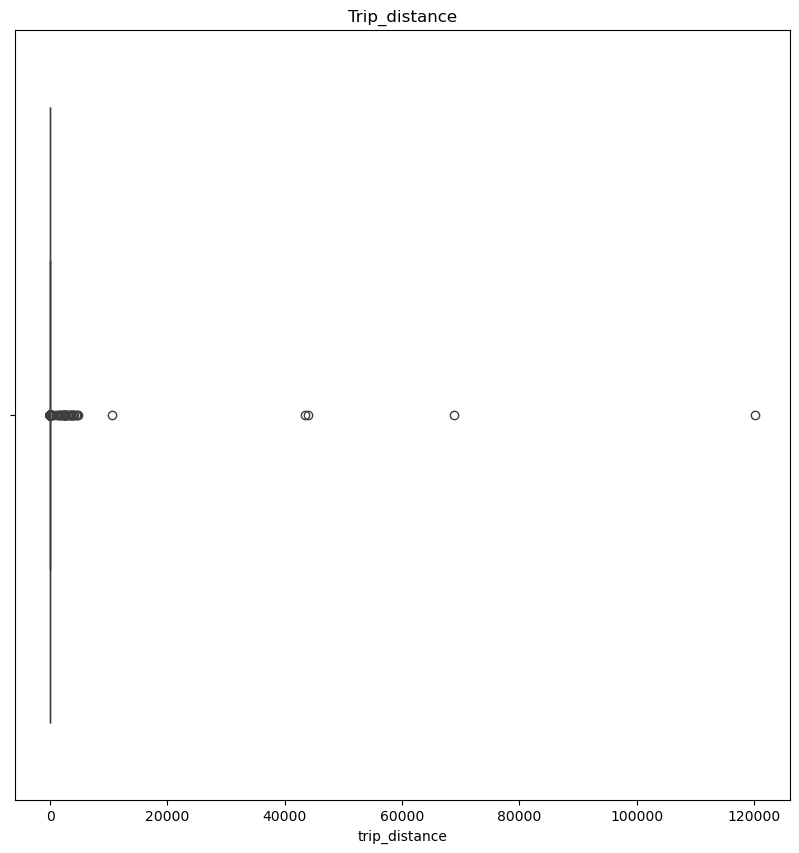

In [290]:
plt.figure(figsize=(10,10)) #figsize(panjang, lebar)
sns.boxplot(data= df,
             x= "trip_distance") 
plt.title("Trip_distance") #menambah title
plt.show()

In [291]:
q1_tripdis = df["trip_distance"].quantile(0.25)
q3_tripdis = df["trip_distance"].quantile(0.75)
iqr_tripdis = q3_tripdis - q1_tripdis
lower_bound = q1_tripdis - 1.5 * iqr_tripdis
upper_bound = q3_tripdis + 1.5 * iqr_tripdis
print(f"lower bound = {lower_bound} , upper bound = {upper_bound}")
#banyak data yg diluar upperbound, asumsi ditetapkan mile yang masih masuk akal ialah dibawa 100

lower bound = -2.039999999999999 , upper bound = 6.359999999999999


- Upperbound dari trip distance sebesar 6.3 mile, akan tetapi secara logika trip dibawah 30 mile masih masuk akal

In [292]:
#trip diatas 30 mile hanya ada 63 data dari 68000 data sehingga tidak terlalu berpengaruh jika dihapus
df[df["trip_distance"]>30].shape[0]

63

In [293]:
df = df[df["trip_distance"]<=30]

In [294]:
skew = df["trip_distance"].skew()
kurtosis = df["trip_distance"].kurtosis()+3
display(skew, kurtosis)

np.float64(2.9501100065508012)

np.float64(16.175505931474238)

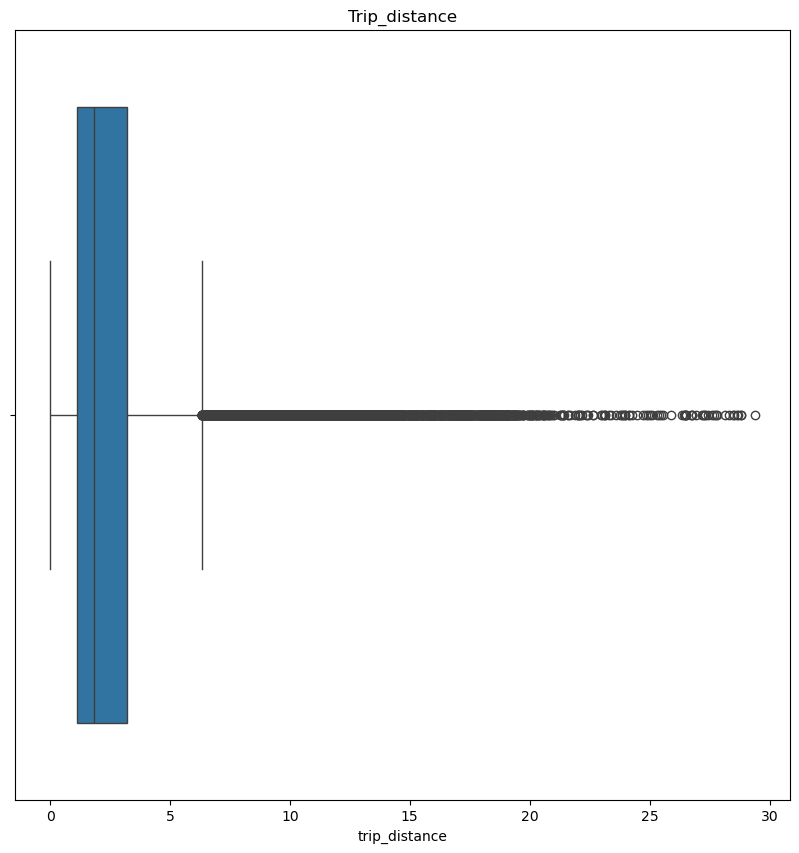

In [295]:
plt.figure(figsize=(10,10)) #figsize(panjang, lebar)
sns.boxplot(data= df,
             x= "trip_distance") 
plt.title("Trip_distance") #menambah title
plt.show()

#### 5.2 total_amount

- jika total_amount bernilai negative atau sama dengan 0, maka dapat diasumsikan bahwa trip tidak jadi atau terjadi refund sehingga trip dapat dianggap sebagai voided trip

In [296]:
df[df['total_amount']<=0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
660,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.00,0.0,-0.5,0.00,0.0,-1.0,-4.50,3.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem North,Boro Zone
896,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.00,0.0,-0.5,0.00,0.0,-1.0,-4.50,4.0,1.0,0.0,Queens,Queensbridge/Ravenswood,Boro Zone,Queens,Queensbridge/Ravenswood,Boro Zone
1315,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.60,-1.0,-0.5,0.00,0.0,-1.0,-11.10,3.0,1.0,0.0,Queens,Jackson Heights,Boro Zone,Queens,Elmhurst,Boro Zone
1579,2,2023-01-02 10:29:51,2023-01-02 10:30:34,N,1.0,264,264,1.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,1.0,1.0,0.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1684,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1.0,0.77,-4.50,0.0,-0.5,0.00,0.0,-0.3,-5.30,4.0,1.0,0.0,Manhattan,East Harlem South,Boro Zone,Manhattan,East Harlem South,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64372,2,2023-01-04 15:11:00,2023-01-04 15:12:00,N,99.0,25,25,1.0,0.13,-27.96,0.0,0.0,3.00,0.0,1.0,-23.96,99.0,99.0,0.0,Brooklyn,Boerum Hill,Boro Zone,Brooklyn,Boerum Hill,Boro Zone
64483,2,2023-01-05 10:51:00,2023-01-05 11:20:00,N,99.0,116,151,1.0,2.22,-43.54,0.0,0.0,0.76,0.0,1.0,-41.78,99.0,99.0,0.0,Manhattan,Hamilton Heights,Boro Zone,Manhattan,Manhattan Valley,Yellow Zone
65104,2,2023-01-10 10:00:00,2023-01-10 10:26:00,N,99.0,168,159,1.0,3.45,-17.38,0.0,0.0,0.26,0.0,1.0,-16.12,99.0,99.0,0.0,Bronx,Mott Haven/Port Morris,Boro Zone,Bronx,Melrose South,Boro Zone
66455,2,2023-01-19 17:48:00,2023-01-19 17:52:00,N,99.0,166,166,1.0,0.38,-35.01,0.0,0.0,4.86,0.0,1.0,-29.15,99.0,99.0,0.0,Manhattan,Morningside Heights,Boro Zone,Manhattan,Morningside Heights,Boro Zone


In [297]:
df = df[df['total_amount']>0]

In [298]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone


### 6. Final Touches

In [299]:
# melihat data unik di setiap kolom
pd.set_option('display.max_colwidth', 1)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66447,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66388,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

#### 6.1 Mengganti Kolom yang menggunakan kode dengan nama kategorinya

In [300]:
df_clean = df.copy()

In [301]:
vendor_map = {
    1: 'Creative Mobile',
    2: 'VeriFone'
}
df_clean['VendorID'] = df_clean['VendorID'].map(vendor_map)

payment_type_map = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip',
    99 : 'Unknown'
}
df_clean['payment_type'] = df_clean['payment_type'].map(payment_type_map)

ratecode_id_map = {
    1: 'Standard Rate',
    2: 'JFK',
    3: 'Newark',
    4: 'Nassau or Westchester',
    5: 'Negotiated Fare',
    6: 'Group Ride',
    99 : 'Unknown'
}
df_clean['RatecodeID'] = df_clean['RatecodeID'].map(ratecode_id_map)

trip_type_map = {
    1: 'Street-hail',
    2: 'Dispatch',
    99: 'Unknown'
}

df_clean['trip_type'] = df_clean['trip_type'].map(trip_type_map)


In [302]:
df_clean.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,VeriFone,2023-01-01 00:26:10,2023-01-01 00:37:11,N,Standard Rate,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,Credit Card,Street-hail,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,VeriFone,2023-01-01 00:51:03,2023-01-01 00:57:49,N,Standard Rate,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,Credit Card,Street-hail,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,VeriFone,2023-01-01 00:35:12,2023-01-01 00:41:32,N,Standard Rate,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,Credit Card,Street-hail,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,Creative Mobile,2023-01-01 00:13:14,2023-01-01 00:19:03,N,Standard Rate,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,Credit Card,Street-hail,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,Creative Mobile,2023-01-01 00:33:04,2023-01-01 00:39:02,N,Standard Rate,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,Credit Card,Street-hail,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone


In [303]:
df_clean.shape[1] -4

21

In [304]:
#kolom yang di drop tidak dibutuhkan dalam analisis
df_clean.drop(columns = ['PULocationID', 'DOLocationID','PUservice_zone', 'DOservice_zone' ], inplace = True)
df_clean = df_clean[['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_type', 'store_and_fwd_flag', 'RatecodeID', 'PUZone', 'PUBorough', 'DOZone', 
            'DOBorough', 'passenger_count', 'trip_distance', 'fare_amount' , 'extra', 'mta_tax', 'tip_amount' , 'tolls_amount', 'improvement_surcharge',
            'congestion_surcharge', 'total_amount', 'payment_type']]


In [305]:
df_clean.rename(columns = {'lpep_pickup_datetime' : 'Pickup_datetime', 'lpep_dropoff_datetime' : 'Dropoff_datetime'}, inplace = True)

In [306]:
df_clean.isna().sum()

VendorID                 0
Pickup_datetime          0
Dropoff_datetime         0
trip_type                0
store_and_fwd_flag       0
RatecodeID               0
PUZone                   0
PUBorough                0
DOZone                   0
DOBorough                0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
congestion_surcharge     0
total_amount             0
payment_type             0
dtype: int64

In [307]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67896 entries, 0 to 68206
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               67896 non-null  object        
 1   Pickup_datetime        67896 non-null  datetime64[ns]
 2   Dropoff_datetime       67896 non-null  datetime64[ns]
 3   trip_type              67896 non-null  object        
 4   store_and_fwd_flag     67896 non-null  object        
 5   RatecodeID             67896 non-null  object        
 6   PUZone                 67896 non-null  object        
 7   PUBorough              67896 non-null  object        
 8   DOZone                 67896 non-null  object        
 9   DOBorough              67896 non-null  object        
 10  passenger_count        67896 non-null  float64       
 11  trip_distance          67896 non-null  float64       
 12  fare_amount            67896 non-null  float64       
 13  extra 

## **Data Analysis**

In [308]:
df_clean.head()

,VendorID,Pickup_datetime,Dropoff_datetime,trip_type,store_and_fwd_flag,RatecodeID,PUZone,PUBorough,DOZone,DOBorough,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,payment_type
0,VeriFone,2023-01-01 00:26:10,2023-01-01 00:37:11,Street-hail,N,Standard Rate,Morningside Heights,Manhattan,Lincoln Square West,Manhattan,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,2.75,24.18,Credit Card
1,VeriFone,2023-01-01 00:51:03,2023-01-01 00:57:49,Street-hail,N,Standard Rate,Bloomingdale,Manhattan,Central Park,Manhattan,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,0.00,15.84,Credit Card
2,VeriFone,2023-01-01 00:35:12,2023-01-01 00:41:32,Street-hail,N,Standard Rate,Steinway,Queens,Old Astoria,Queens,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,0.00,11.64,Credit Card
3,Creative Mobile,2023-01-01 00:13:14,2023-01-01 00:19:03,Street-hail,N,Standard Rate,Central Harlem,Manhattan,Upper West Side North,Manhattan,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,0.00,10.20,Credit Card
4,Creative Mobile,2023-01-01 00:33:04,2023-01-01 00:39:02,Street-hail,N,Standard Rate,Central Harlem,Manhattan,East Harlem North,Manhattan,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,0.00,8.00,Credit Card


In [309]:
df_clean.to_csv('NYC TLC January 2023.csv', index=False)

### 1. Vendor Favorit

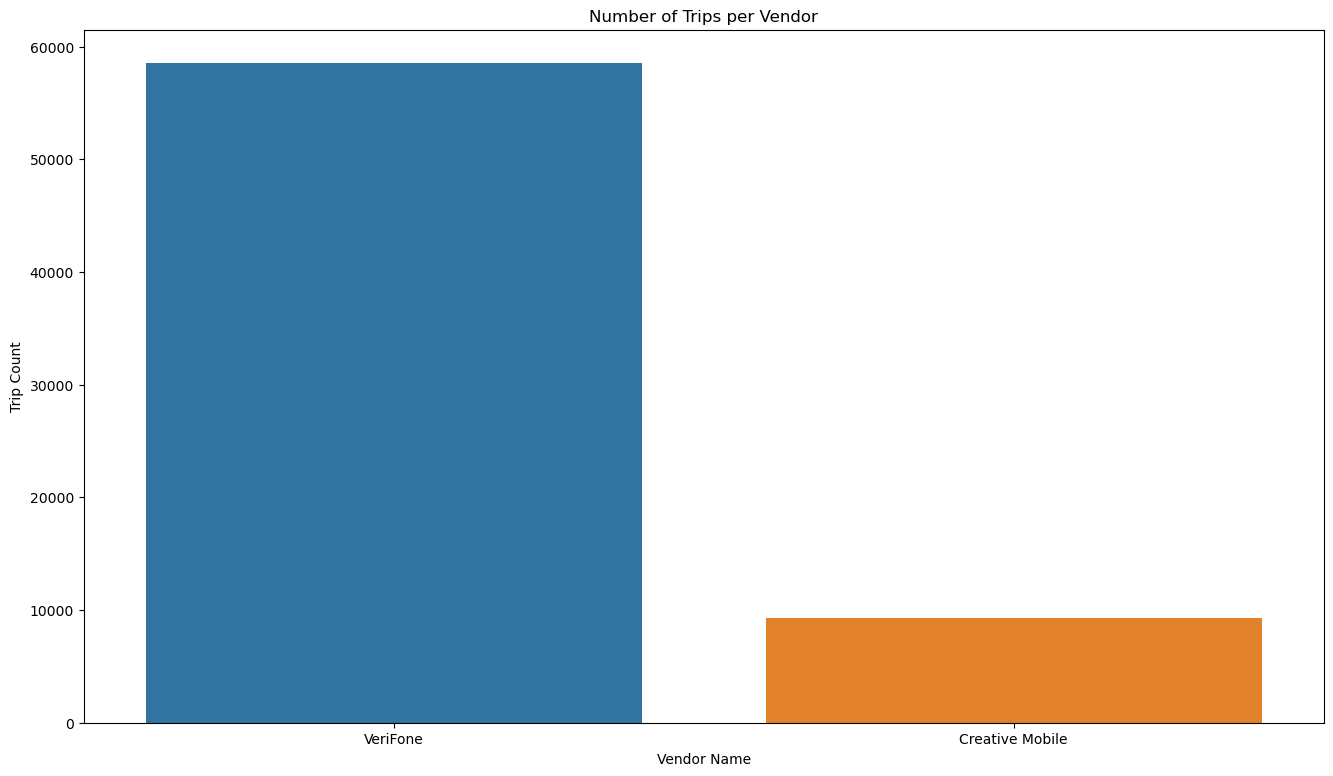

In [310]:
#Trips Per vendor
plt.figure(figsize = (16,9))
sns.countplot(data=df_clean, x='VendorID', hue = "VendorID")

plt.title('Number of Trips per Vendor')
plt.xlabel('Vendor Name')
plt.ylabel('Trip Count')
plt.show()

Di New York, Vendor VeriFone lebih menguasai pasar dari pada Creative Mobile


### 2. Trip Distance

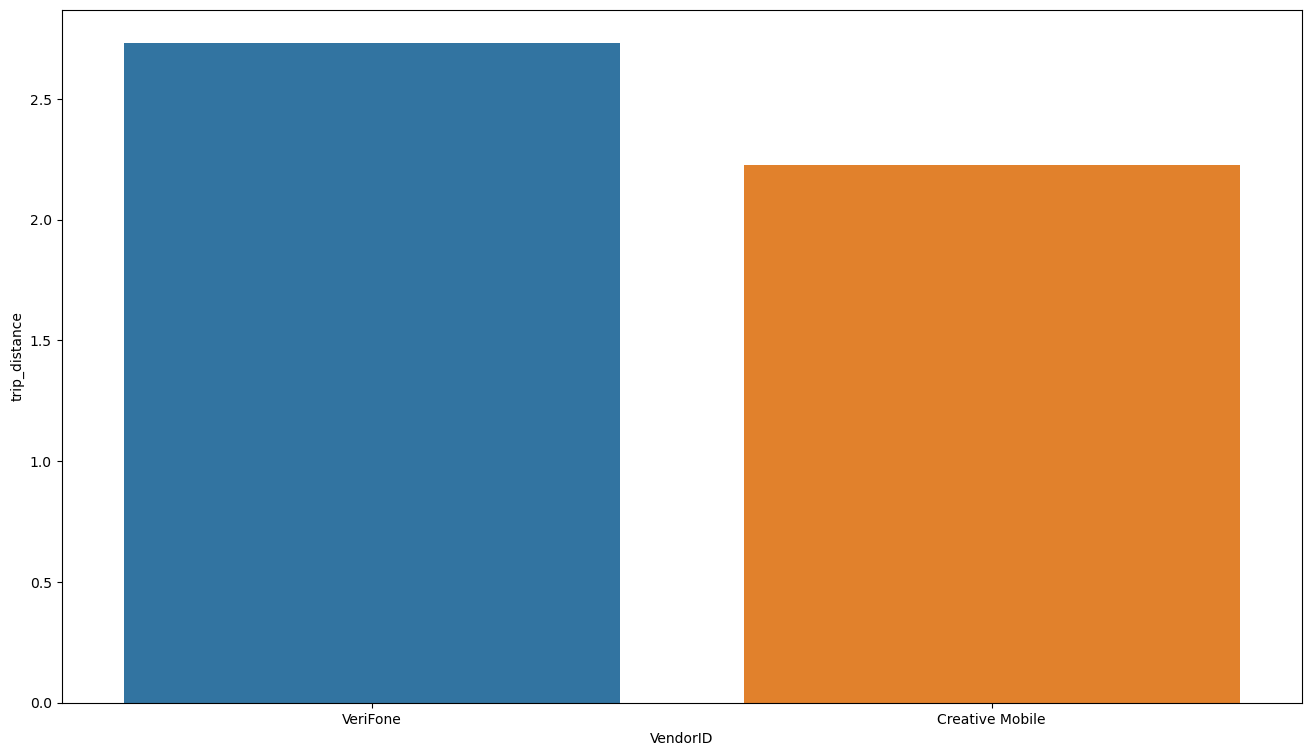

In [311]:
plt.figure(figsize = (16,9))
sns.barplot(data = df_clean,
            x = "VendorID",
            y = "trip_distance",
            estimator = "mean", #default estimatornya mean
            errorbar = None, #untuk menghilangkan garis hitam confidence interval
            hue = 'VendorID')  
plt.show()

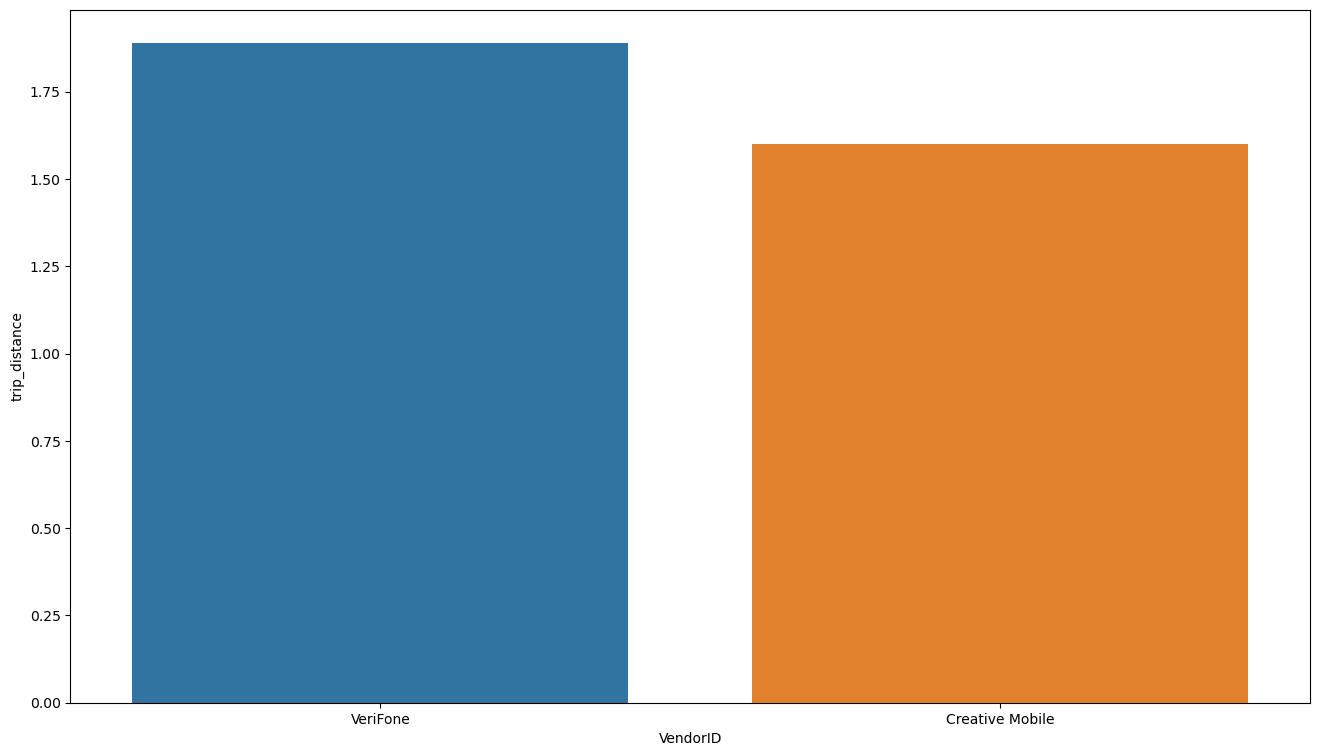

In [312]:
plt.figure(figsize = (16,9))
sns.barplot(data = df_clean,
            x = "VendorID",
            y = "trip_distance",
            estimator = "median", #default estimatornya mean
            errorbar = None,  #untuk menghilangkan garis hitam confidence interval
            hue = 'VendorID') 
plt.show()


Vendor VeriFone dalam satu kali trip memiliki rata-rata jarak lebih tinggi. Masuk akal karena VeriFone juga memiliki jumlah trip yang lebih banyak secara signifikan 

### 3.Number of Trips per day

In [313]:
pd.PeriodIndex(df_clean["Pickup_datetime"], freq="D").astype("str")

Index(['2023-01-01', '2023-01-01', '2023-01-01', '2023-01-01', '2023-01-01',
       '2023-01-01', '2023-01-01', '2023-01-01', '2023-01-01', '2023-01-01',
       ...
       '2023-01-31', '2023-01-31', '2023-01-31', '2023-01-31', '2023-01-31',
       '2023-01-31', '2023-01-31', '2023-01-31', '2023-01-31', '2023-01-31'],
      dtype='object', name='Pickup_datetime', length=67896)

In [314]:
df_clean["Pickup_date"] = pd.PeriodIndex(df_clean["Pickup_datetime"], freq="D").astype("str").str[-2:]
count_date = df_clean.groupby('Pickup_date').size().reset_index(name='Count')
count_date

,Pickup_date,Count
0,01,1460
1,02,1557
2,03,2109
3,04,2362
4,05,2398
5,06,2533
6,07,2151
7,08,1653
8,09,2206
9,10,2160


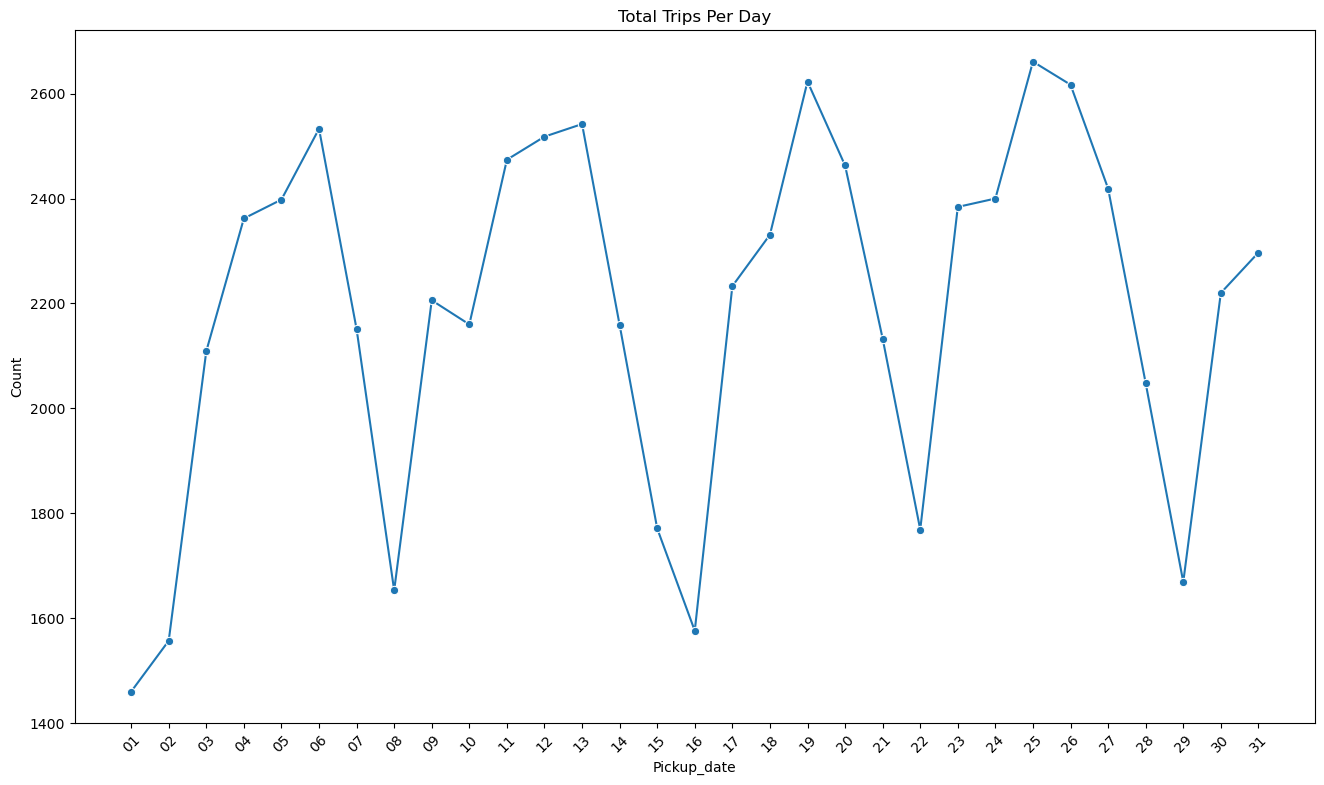

In [315]:
plt.figure(figsize = (16,9))
sns.lineplot(data = count_date,
             x = "Pickup_date",
             y = "Count",
             errorbar = None, #hilangin aura confidence interval
             marker = 'o') #buat ada dotnya

plt.title("Total Trips Per Day")
plt.xticks(rotation = 45)
plt.show()


In [316]:
df_clean.head()

,VendorID,Pickup_datetime,Dropoff_datetime,trip_type,store_and_fwd_flag,RatecodeID,PUZone,PUBorough,DOZone,DOBorough,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,payment_type,Pickup_date
0,VeriFone,2023-01-01 00:26:10,2023-01-01 00:37:11,Street-hail,N,Standard Rate,Morningside Heights,Manhattan,Lincoln Square West,Manhattan,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,2.75,24.18,Credit Card,01
1,VeriFone,2023-01-01 00:51:03,2023-01-01 00:57:49,Street-hail,N,Standard Rate,Bloomingdale,Manhattan,Central Park,Manhattan,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,0.00,15.84,Credit Card,01
2,VeriFone,2023-01-01 00:35:12,2023-01-01 00:41:32,Street-hail,N,Standard Rate,Steinway,Queens,Old Astoria,Queens,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,0.00,11.64,Credit Card,01
3,Creative Mobile,2023-01-01 00:13:14,2023-01-01 00:19:03,Street-hail,N,Standard Rate,Central Harlem,Manhattan,Upper West Side North,Manhattan,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,0.00,10.20,Credit Card,01
4,Creative Mobile,2023-01-01 00:33:04,2023-01-01 00:39:02,Street-hail,N,Standard Rate,Central Harlem,Manhattan,East Harlem North,Manhattan,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,0.00,8.00,Credit Card,01


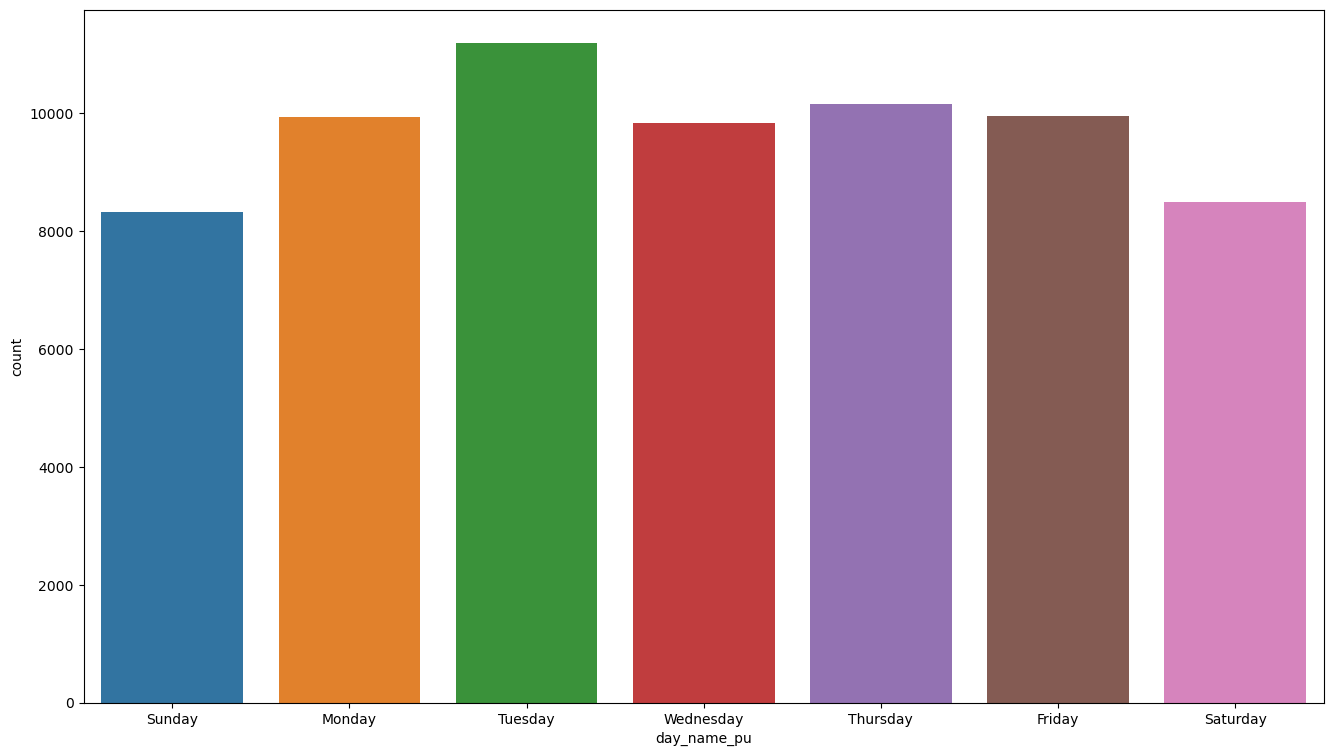

In [317]:
df_clean['day_name_pu'] = df_clean['Pickup_datetime'].dt.day_name()


plt.figure(figsize = (16,9))
sns.countplot(data=df_clean, x='day_name_pu', hue = "day_name_pu")
plt.show()




Terdapat pattern yang cukup jelas, yaitu pemesanan taxi akan mengalami puncak di hari kerja

In [318]:
count_date_vendor = df_clean.groupby(['VendorID','Pickup_date']).size().reset_index(name='Count')
count_date_vendor

,VendorID,Pickup_date,Count
0,Creative Mobile,01,165
1,Creative Mobile,02,228
2,Creative Mobile,03,319
3,Creative Mobile,04,335
4,Creative Mobile,05,325
...,...,...,...
57,VeriFone,27,2106
58,VeriFone,28,1788
59,VeriFone,29,1441
60,VeriFone,30,1884


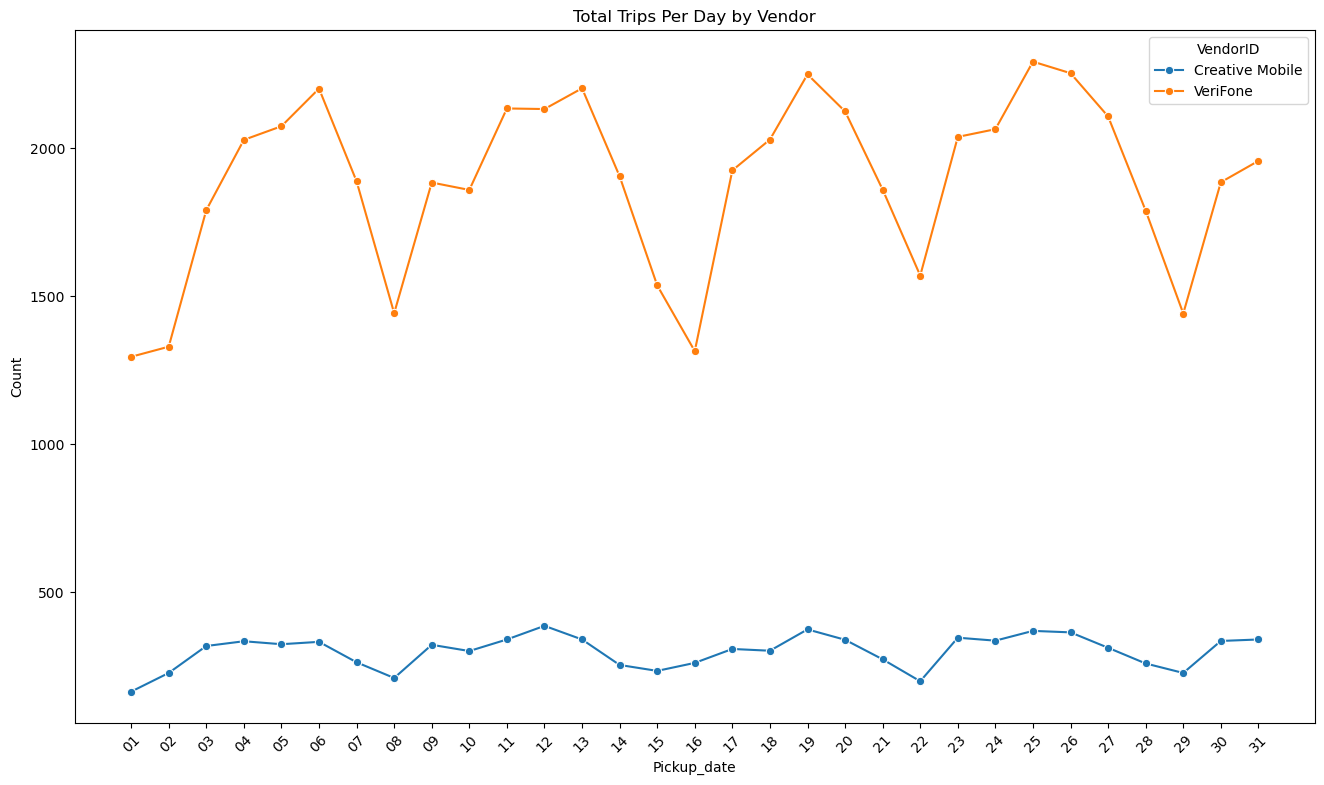

In [319]:
plt.figure(figsize = (16,9))
sns.lineplot(data = count_date_vendor,
             x = "Pickup_date",
             y = "Count",
             hue = "VendorID",
             errorbar = None, #hilangin aura confidence interval
             marker = 'o') #buat ada dotnya

plt.title("Total Trips Per Day by Vendor")
plt.xticks(rotation = 45)
plt.show()


Jika dilihat berdasarkan vendor, pattern yang terbentuk sama yaitu pemesanan taxi akan mengalami puncak di weekend (jumat/sabtu) dan mengalami drop pada awal minggu (minggu/senin). Akan tetapi, pemesanan didominasi oleh VeriFone

### 4. Numbers of Trips per Hour

In [320]:
pd.PeriodIndex(df_clean["Pickup_datetime"], freq="h").astype("str").str[-5:]

Index(['00:00', '00:00', '00:00', '00:00', '00:00', '00:00', '00:00', '00:00',
       '00:00', '00:00',
       ...
       '20:00', '20:00', '20:00', '20:00', '21:00', '21:00', '22:00', '23:00',
       '23:00', '23:00'],
      dtype='object', name='Pickup_datetime', length=67896)

In [321]:
df_clean["Pickup_hour"] = pd.PeriodIndex(df_clean["Pickup_datetime"], freq="h").astype("str").str[-5:]
count_hour = df_clean.groupby('Pickup_hour').size().reset_index(name='Count')
count_hour

,Pickup_hour,Count
0,00:00,1125
1,01:00,887
2,02:00,653
3,03:00,591
4,04:00,447
5,05:00,426
6,06:00,993
7,07:00,2643
8,08:00,3206
9,09:00,3496


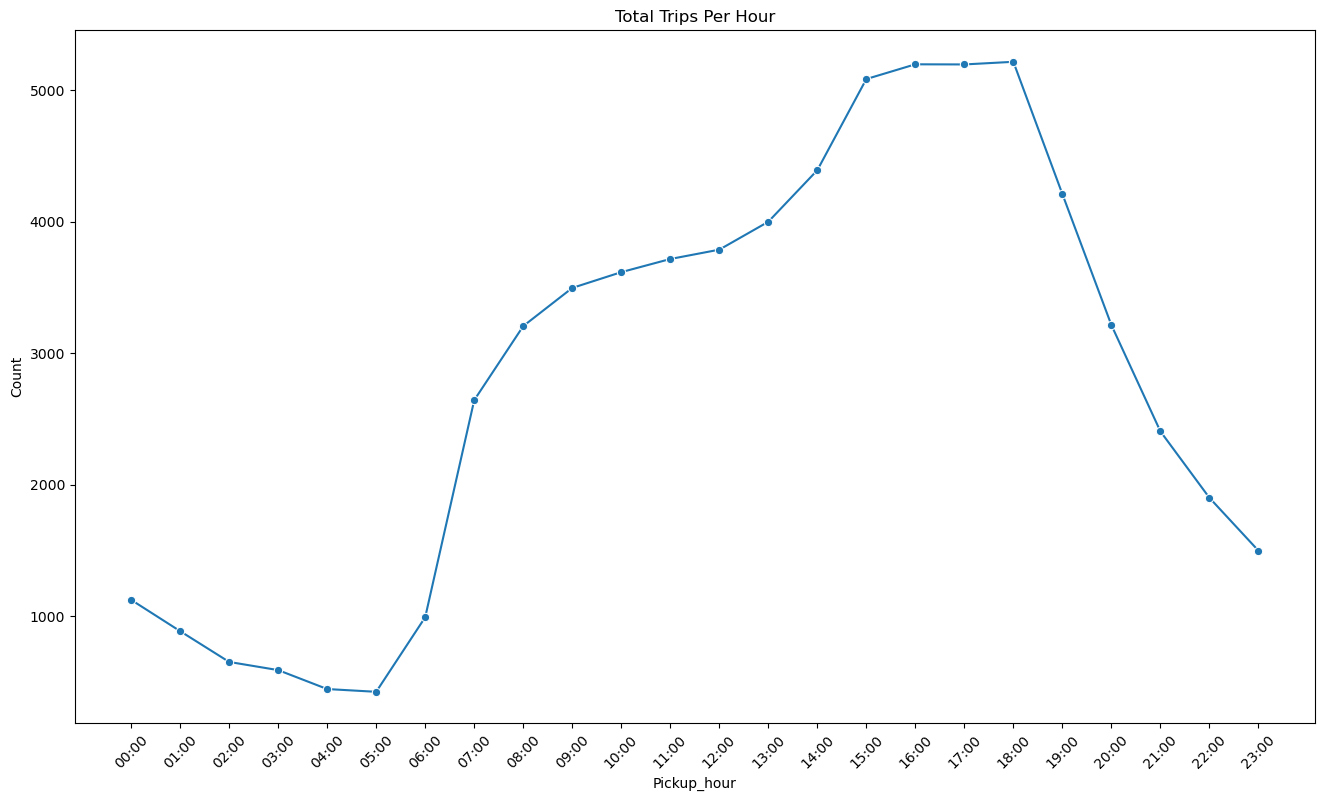

In [322]:
plt.figure(figsize = (16,9))
sns.lineplot(data = count_hour,
             x = "Pickup_hour",
             y = "Count",
             errorbar = None, #hilangin aura confidence interval
             marker = 'o') #buat ada dotnya

plt.title("Total Trips Per Hour")
plt.xticks(rotation = 45)
plt.show()

Peak hour pemesanan taxi ialah jam 18:00

In [323]:
count_hour_vendor = df_clean.groupby(['VendorID','Pickup_hour']).size().reset_index(name='Count')
count_hour_vendor

,VendorID,Pickup_hour,Count
0,Creative Mobile,00:00,89
1,Creative Mobile,01:00,77
2,Creative Mobile,02:00,73
3,Creative Mobile,03:00,77
4,Creative Mobile,04:00,55
5,Creative Mobile,05:00,69
6,Creative Mobile,06:00,210
7,Creative Mobile,07:00,457
8,Creative Mobile,08:00,463
9,Creative Mobile,09:00,546


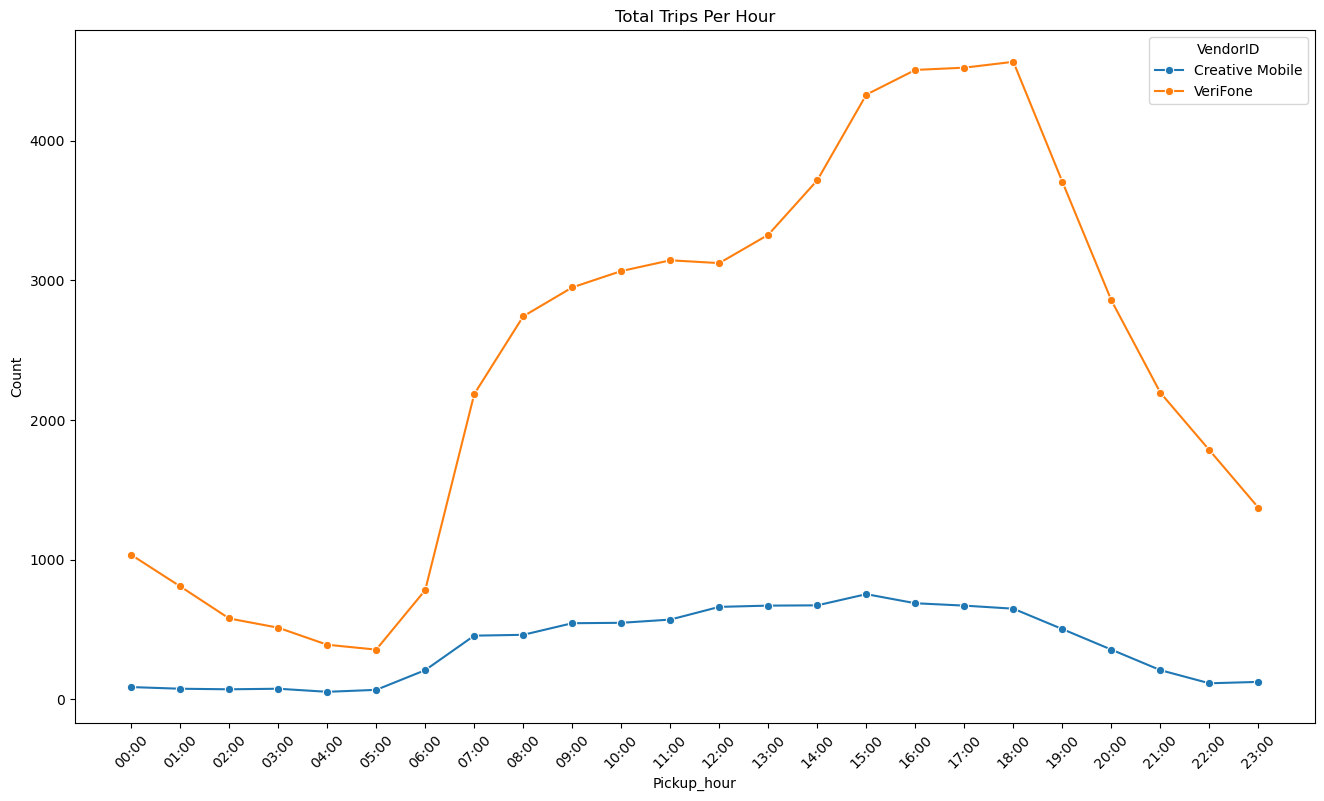

In [324]:
plt.figure(figsize = (16,9))
sns.lineplot(data = count_hour_vendor,
             x = "Pickup_hour",
             y = "Count",
             hue = "VendorID",
             errorbar = None, #hilangin aura confidence interval
             marker = 'o') #buat ada dotnya

plt.title("Total Trips Per Hour")
plt.xticks(rotation = 45)
plt.show()

Dapat dilihat bahwa untuk peak hour CreativeMobile terjadi pada pukul 15:00, sedangkan untuk VeriFone terjadi pada pukul 18:00

### 5. Daily Passenger Count

In [325]:
df_clean["Pickup_date"] = pd.PeriodIndex(df_clean["Pickup_datetime"], freq="D").astype("str").str[-2:]
p_count_date = df_clean.groupby('Pickup_date')[["passenger_count"]].sum()
p_count_date

,passenger_count
Pickup_date,
01,1964.0
02,2018.0
03,2841.0
04,2969.0
05,3198.0
06,3413.0
07,2724.0
08,2178.0
09,2873.0


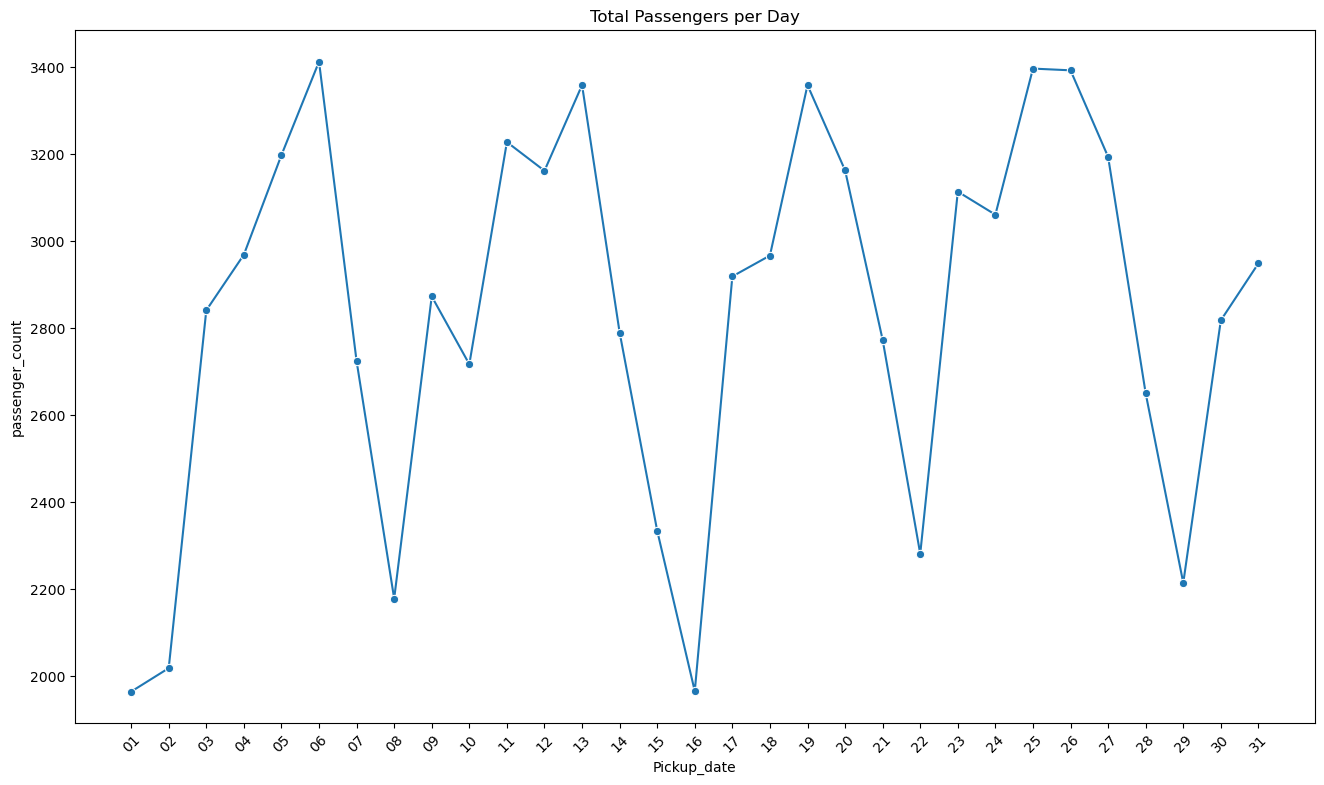

In [326]:
plt.figure(figsize = (16,9))
sns.lineplot(data = p_count_date,
             x = "Pickup_date",
             y = "passenger_count",
             errorbar = None, #hilangin aura confidence interval
             marker = 'o') #buat ada dotnya

plt.title("Total Passengers per Day")
plt.xticks(rotation = 45)
plt.show()

Terdapat pola yang sama dengan total trips, yaitu terjadi puncak pada weekend

In [327]:
p_count_date_vendor = df_clean.groupby(['VendorID','Pickup_date'])[["passenger_count"]].sum()
p_count_date_vendor

passenger_count
VendorID        Pickup_date                 
Creative Mobile 01           192.0          
                02           262.0          
                03           350.0          
                04           371.0          
                05           351.0          
...                            ...          
VeriFone        27           2853.0         
                28           2353.0         
                29           1940.0         
                30           2456.0         
                31           2595.0         

[62 rows x 1 columns]

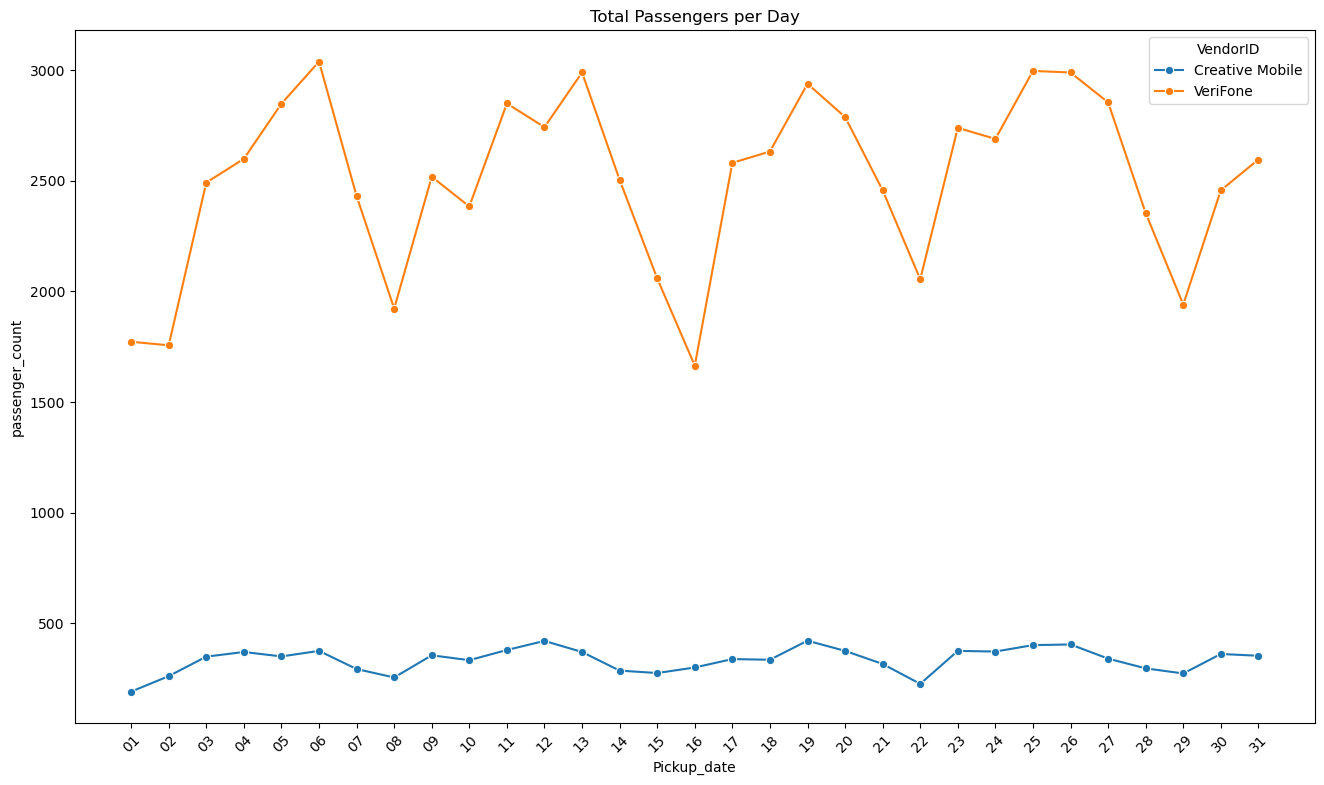

In [328]:
plt.figure(figsize = (16,9))
sns.lineplot(data = p_count_date_vendor,
             x = "Pickup_date",
             y = "passenger_count",
             hue = "VendorID",
             errorbar = None, #hilangin aura confidence interval
             marker = 'o') #buat ada dotnya

plt.title("Total Passengers per Day")
plt.xticks(rotation = 45)
plt.show()

### 6. Total Trips per PULocation

In [329]:
df_clean.head()

,VendorID,Pickup_datetime,Dropoff_datetime,trip_type,store_and_fwd_flag,RatecodeID,PUZone,PUBorough,DOZone,DOBorough,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,payment_type,Pickup_date,day_name_pu,Pickup_hour
0,VeriFone,2023-01-01 00:26:10,2023-01-01 00:37:11,Street-hail,N,Standard Rate,Morningside Heights,Manhattan,Lincoln Square West,Manhattan,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,2.75,24.18,Credit Card,01,Sunday,00:00
1,VeriFone,2023-01-01 00:51:03,2023-01-01 00:57:49,Street-hail,N,Standard Rate,Bloomingdale,Manhattan,Central Park,Manhattan,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,0.00,15.84,Credit Card,01,Sunday,00:00
2,VeriFone,2023-01-01 00:35:12,2023-01-01 00:41:32,Street-hail,N,Standard Rate,Steinway,Queens,Old Astoria,Queens,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,0.00,11.64,Credit Card,01,Sunday,00:00
3,Creative Mobile,2023-01-01 00:13:14,2023-01-01 00:19:03,Street-hail,N,Standard Rate,Central Harlem,Manhattan,Upper West Side North,Manhattan,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,0.00,10.20,Credit Card,01,Sunday,00:00
4,Creative Mobile,2023-01-01 00:33:04,2023-01-01 00:39:02,Street-hail,N,Standard Rate,Central Harlem,Manhattan,East Harlem North,Manhattan,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,0.00,8.00,Credit Card,01,Sunday,00:00


In [330]:
top_10_PUzone = df_clean['PUZone'].value_counts().head(10).reset_index()
top_10_PUzone

,PUZone,count
0,East Harlem North,13240
1,East Harlem South,9085
2,Central Harlem,4041
3,Morningside Heights,3874
4,Forest Hills,3826
5,Elmhurst,2911
6,Central Park,2864
7,Fort Greene,2192
8,Astoria,1952
9,Washington Heights South,1802


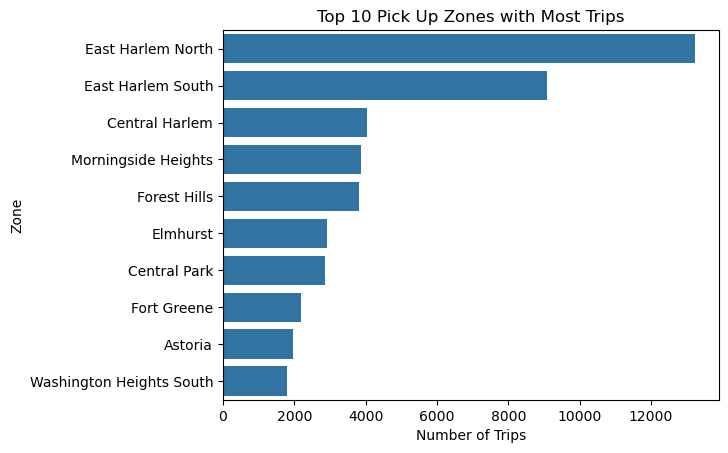

In [331]:
sns.barplot(x='count', y='PUZone', data=top_10_PUzone)

plt.title('Top 10 Pick Up Zones with Most Trips')
plt.xlabel('Number of Trips')
plt.ylabel('Zone')
plt.show()

In [332]:
top_PUBorough = df_clean['PUBorough'].value_counts().reset_index()
top_PUBorough

,PUBorough,count
0,Manhattan,39350
1,Queens,17825
2,Brooklyn,9293
3,Bronx,1222
4,Unknown,193
5,Staten Island,12
6,EWR,1


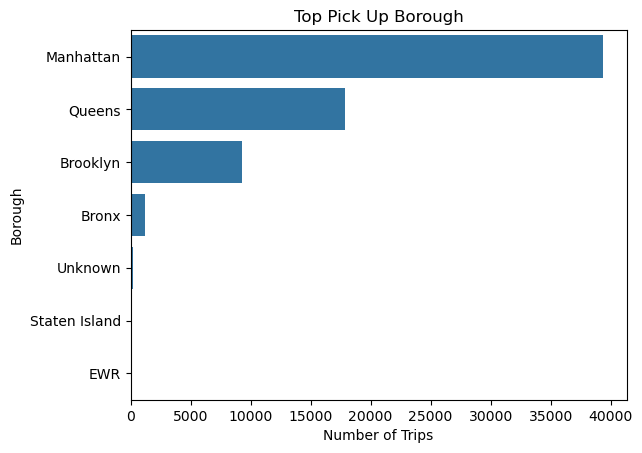

In [333]:
sns.barplot(x='count', y='PUBorough', data=top_PUBorough)
plt.title('Top Pick Up Borough')
plt.xlabel('Number of Trips')
plt.ylabel('Borough')
plt.show()

<Axes: ylabel='PUZone'>

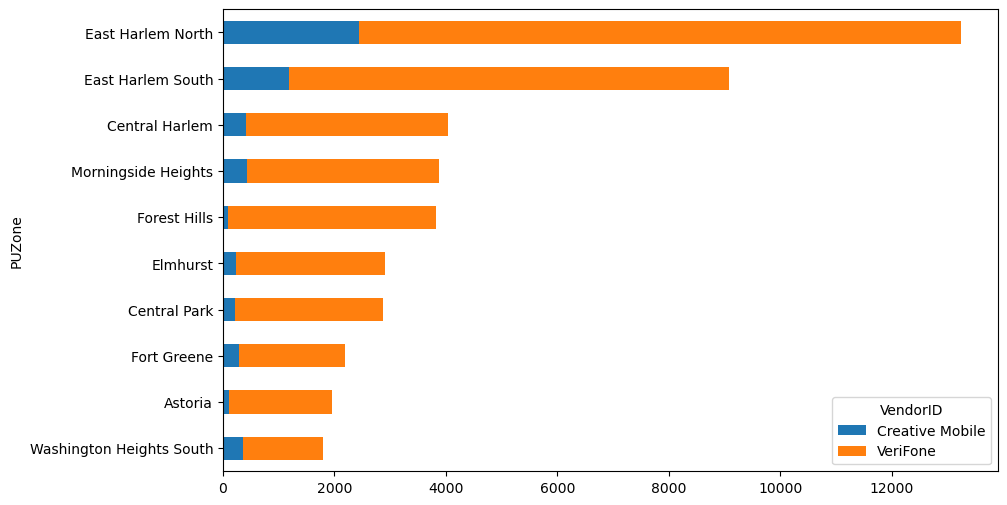

In [334]:
zone_vendor_counts = df_clean.groupby(['PUZone', 'VendorID']).size().reset_index(name='Trip Count')

# 2️⃣ Get top 10 Zones by total trips
top_zones = (
    zone_vendor_counts.groupby('PUZone')['Trip Count']
    .sum()
    .nlargest(10)
    .index
)

top_data = zone_vendor_counts[zone_vendor_counts['PUZone'].isin(top_zones)]


pivot_df = top_data.pivot(index='PUZone', columns='VendorID', values='Trip Count').fillna(0)


pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=True).index]

pivot_df.plot(kind='barh', stacked=True, figsize=(10,6))

Pemesanan taxi paling banyak terjadi di zone East Harlem North

### 7. Total Trips per DOLocation

In [335]:
top_10_DOZone = df_clean['DOZone'].value_counts().head(10).reset_index()
top_10_DOZone

,DOZone,count
0,East Harlem South,3503
1,East Harlem North,3376
2,Upper East Side North,2760
3,Central Harlem,2610
4,Central Harlem North,2336
5,Upper West Side North,2334
6,Morningside Heights,2262
7,Forest Hills,1597
8,Yorkville West,1572
9,Upper West Side South,1483


In [336]:
top_DOBorough = df_clean['DOBorough'].value_counts().reset_index()
top_DOBorough

,DOBorough,count
0,Manhattan,39529
1,Queens,17511
2,Brooklyn,7808
3,Bronx,2372
4,Unknown,640
5,EWR,20
6,Staten Island,16


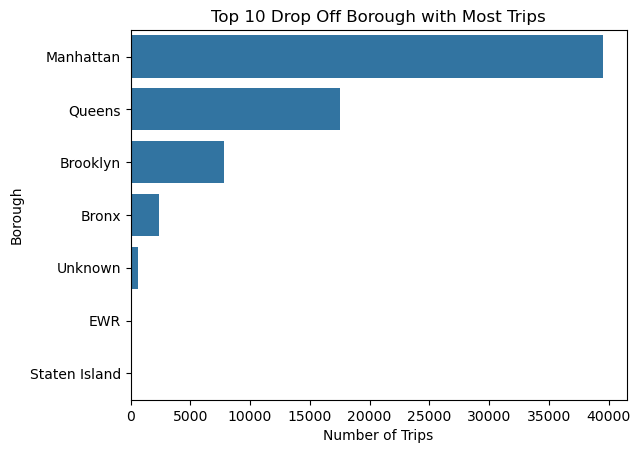

In [337]:
sns.barplot(x='count', y='DOBorough', data=top_DOBorough)

plt.title('Top 10 Drop Off Borough with Most Trips')
plt.xlabel('Number of Trips')
plt.ylabel('Borough')
plt.show()

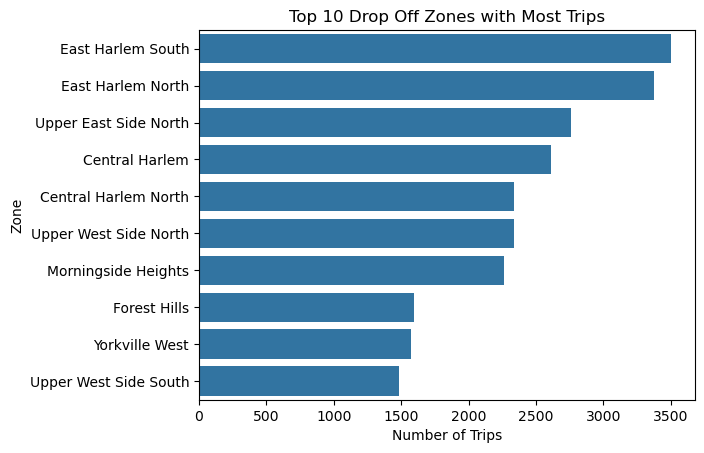

In [338]:
sns.barplot(x='count', y='DOZone', data=top_10_DOZone)

plt.title('Top 10 Drop Off Zones with Most Trips')
plt.xlabel('Number of Trips')
plt.ylabel('Zone')
plt.show()

In [339]:
top_DOBorough = df_clean['DOBorough'].value_counts().reset_index()
top_DOBorough

,DOBorough,count
0,Manhattan,39529
1,Queens,17511
2,Brooklyn,7808
3,Bronx,2372
4,Unknown,640
5,EWR,20
6,Staten Island,16


<Axes: ylabel='DOZone'>

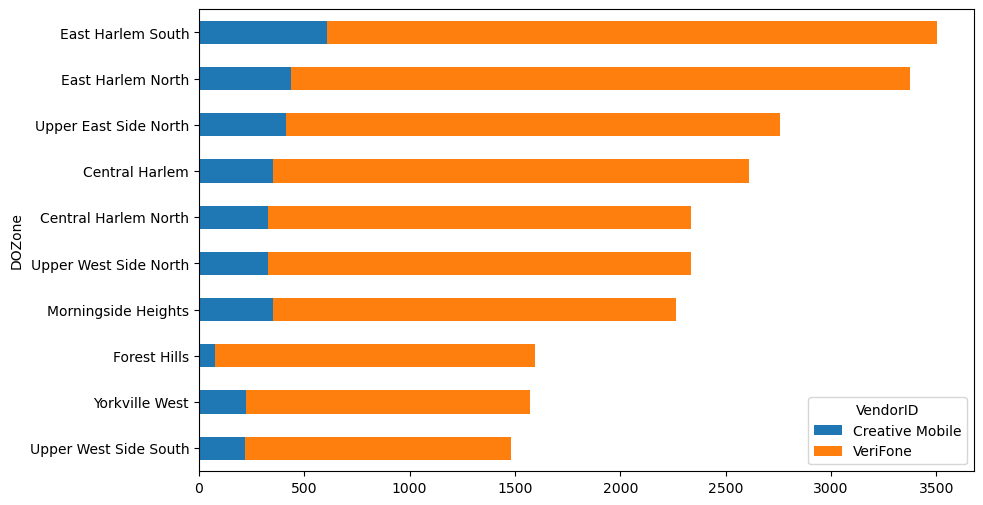

In [340]:
zone_vendor_counts = df_clean.groupby(['DOZone', 'VendorID']).size().reset_index(name='Trip Count')

# 2️⃣ Get top 10 Zones by total trips
top_zones = (
    zone_vendor_counts.groupby('DOZone')['Trip Count']
    .sum()
    .nlargest(10)
    .index
)

top_data = zone_vendor_counts[zone_vendor_counts['DOZone'].isin(top_zones)]


pivot_df = top_data.pivot(index='DOZone', columns='VendorID', values='Trip Count').fillna(0)


pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=True).index]

pivot_df.plot(kind='barh', stacked=True, figsize=(10,6))

Destinasi lokasi terpopuler ialah East Harlem South

### 8. Tip analysis

Jumlah tip secara tidak langsung dapat diartikan sebagai tingkat kepuasan customer. Semakin banyak tip yang diberi, semakin puas customer terhadap layanan taxi. Berikut merupakan analisis dari tip

In [341]:
df_clean.head()

,VendorID,Pickup_datetime,Dropoff_datetime,trip_type,store_and_fwd_flag,RatecodeID,PUZone,PUBorough,DOZone,DOBorough,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,payment_type,Pickup_date,day_name_pu,Pickup_hour
0,VeriFone,2023-01-01 00:26:10,2023-01-01 00:37:11,Street-hail,N,Standard Rate,Morningside Heights,Manhattan,Lincoln Square West,Manhattan,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,2.75,24.18,Credit Card,01,Sunday,00:00
1,VeriFone,2023-01-01 00:51:03,2023-01-01 00:57:49,Street-hail,N,Standard Rate,Bloomingdale,Manhattan,Central Park,Manhattan,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,0.00,15.84,Credit Card,01,Sunday,00:00
2,VeriFone,2023-01-01 00:35:12,2023-01-01 00:41:32,Street-hail,N,Standard Rate,Steinway,Queens,Old Astoria,Queens,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,0.00,11.64,Credit Card,01,Sunday,00:00
3,Creative Mobile,2023-01-01 00:13:14,2023-01-01 00:19:03,Street-hail,N,Standard Rate,Central Harlem,Manhattan,Upper West Side North,Manhattan,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,0.00,10.20,Credit Card,01,Sunday,00:00
4,Creative Mobile,2023-01-01 00:33:04,2023-01-01 00:39:02,Street-hail,N,Standard Rate,Central Harlem,Manhattan,East Harlem North,Manhattan,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,0.00,8.00,Credit Card,01,Sunday,00:00


In [342]:
#persentase yang memberikan tip
df_clean[df_clean["tip_amount"]>0].shape[0] / df_clean.shape[0]


0.5793272063155415

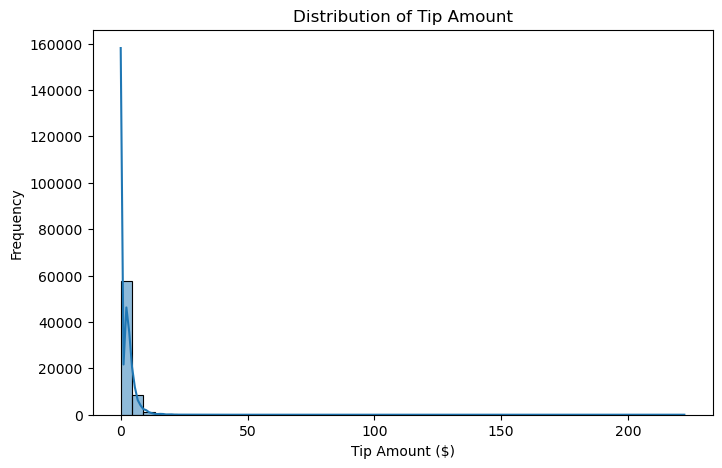

In [343]:
#melakukan pengecekan apakah parametrik atau tidak
plt.figure(figsize=(8,5))
sns.histplot(df_clean['tip_amount'], bins=50, kde=True)
plt.title('Distribution of Tip Amount')
plt.xlabel('Tip Amount ($)')
plt.ylabel('Frequency')
plt.show()

In [344]:
print("Skewness:", df_clean['tip_amount'].skew())
print("Kurtosis:", df_clean['tip_amount'].kurtosis() + 3)

Skewness: 10.220580667254925
Kurtosis: 481.80068793145955


H0 : Tidak ada perbedaan antara tip pada Vendor Creative Mobile dan VeriFone

Ha : Ada perbedaan antara tip pada vendor Creative Mobile dan Verifone

In [345]:
#karena data non parametrik dan ingin membandingkan 2 sample unpaired
from scipy.stats import  mannwhitneyu

vendor_1 = df_clean[df_clean['VendorID'] == "Creative Mobile"]['tip_amount']
vendor_2 = df_clean[df_clean['VendorID'] == "VeriFone"]['tip_amount']

stats, p_value = mannwhitneyu(vendor_1,vendor_2,alternative = "two-sided")

p_value #nilai p_value < 0.05 sehingga H0 ditolak. Ada perbedaan antara tip pada vendor Creative Mobile dan Verifone


np.float64(8.50869165647402e-92)

Dapat dilihat bahwa terdapat perbedaan jumlah tip yang cukup signifikan dari kedua vendor. Berikut adalah analisis yang dilakukan untuk mengetahui penyebabnya

#### 8.1 Membandingkan rata-rata tip, fare, dan jarak trip per Vendor

In [346]:
df_clean.groupby('VendorID')[['tip_amount', 'fare_amount', 'trip_distance']].mean().round(2)


,tip_amount,fare_amount,trip_distance
VendorID,,,
Creative Mobile,1.67,16.40,2.23
VeriFone,2.22,16.66,2.73


#### 8.2 Tip Berdasarkan Pick Up Location

In [347]:
zone_tips = df_clean.groupby('PUZone')['tip_amount'].mean().reset_index().sort_values('tip_amount', ascending=False).head(10)
zone_tips


,PUZone,tip_amount
115,Lenox Hill West,25.880000
140,Newark Airport,19.000000
192,Times Sq/Theatre District,12.033333
191,Sutton Place/Turtle Bay North,9.116667
201,Upper West Side South,9.062857
189,Sunset Park East,8.950000
222,World Trade Center,8.075000
145,Ocean Parkway South,7.684000
90,Greenwich Village North,6.055000
153,Penn Station/Madison Sq West,5.605000


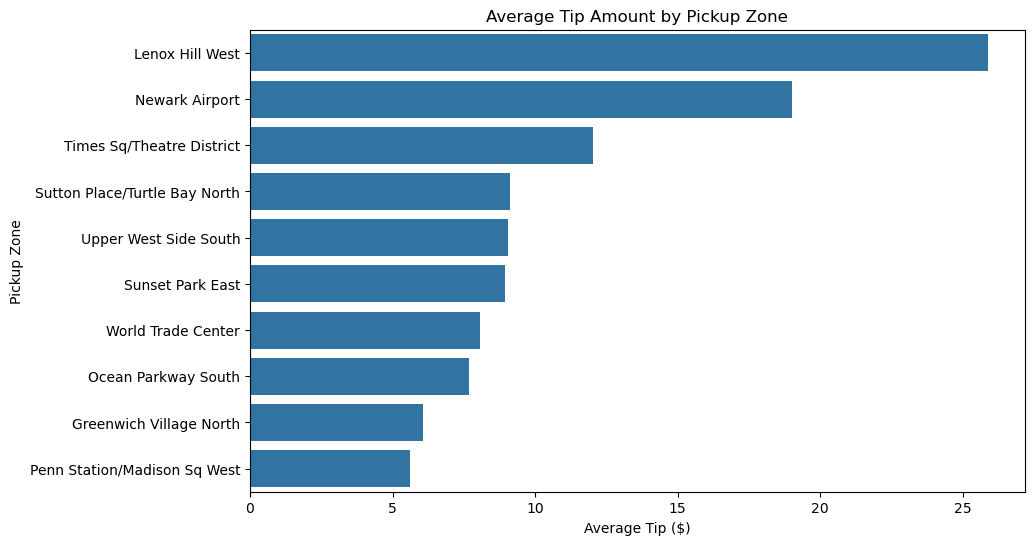

In [348]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=zone_tips,
    x='tip_amount',
    y='PUZone'
)
plt.title('Average Tip Amount by Pickup Zone')
plt.xlabel('Average Tip ($)')
plt.ylabel('Pickup Zone')
plt.show()

In [349]:
best_tip_zones = df_clean[df_clean['PUZone'].isin(zone_tips['PUZone'])]
best_tip_zones.head()

,VendorID,Pickup_datetime,Dropoff_datetime,trip_type,store_and_fwd_flag,RatecodeID,PUZone,PUBorough,DOZone,DOBorough,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,payment_type,Pickup_date,day_name_pu,Pickup_hour
2770,VeriFone,2023-01-03 01:19:09,2023-01-03 01:20:46,Street-hail,N,Standard Rate,Ocean Parkway South,Brooklyn,Ocean Parkway South,Brooklyn,1.0,0.27,4.4,1.0,0.5,36.8,0.0,0.3,0.0,43.0,Credit Card,03,Tuesday,01:00
3065,Creative Mobile,2023-01-03 08:20:45,2023-01-03 08:53:49,Street-hail,N,Standard Rate,Upper West Side South,Manhattan,Williamsbridge/Olinville,Bronx,1.0,0.00,39.5,0.0,1.5,0.0,0.0,1.0,0.0,41.0,Credit Card,03,Tuesday,08:00
4060,VeriFone,2023-01-03 16:02:37,2023-01-03 16:28:28,Street-hail,N,Standard Rate,Sunset Park East,Brooklyn,Park Slope,Brooklyn,2.0,3.71,25.4,2.5,0.5,12.0,0.0,1.0,0.0,41.4,Credit Card,03,Tuesday,16:00
6089,VeriFone,2023-01-04 16:02:29,2023-01-04 16:29:23,Street-hail,N,Standard Rate,Sunset Park East,Brooklyn,Park Slope,Brooklyn,1.0,3.74,26.1,2.5,0.5,12.0,0.0,1.0,0.0,42.1,Credit Card,04,Wednesday,16:00
6440,Creative Mobile,2023-01-04 18:23:26,2023-01-04 19:07:04,Street-hail,N,Standard Rate,Times Sq/Theatre District,Manhattan,University Heights/Morris Heights,Bronx,1.0,0.00,28.2,0.0,1.5,0.0,0.0,1.0,0.0,29.7,Credit Card,04,Wednesday,18:00


In [350]:
best_tip_zones_trip_count = best_tip_zones.groupby(['PUZone', 'VendorID']).size().reset_index(name='Trip Count')

<Axes: ylabel='PUZone'>

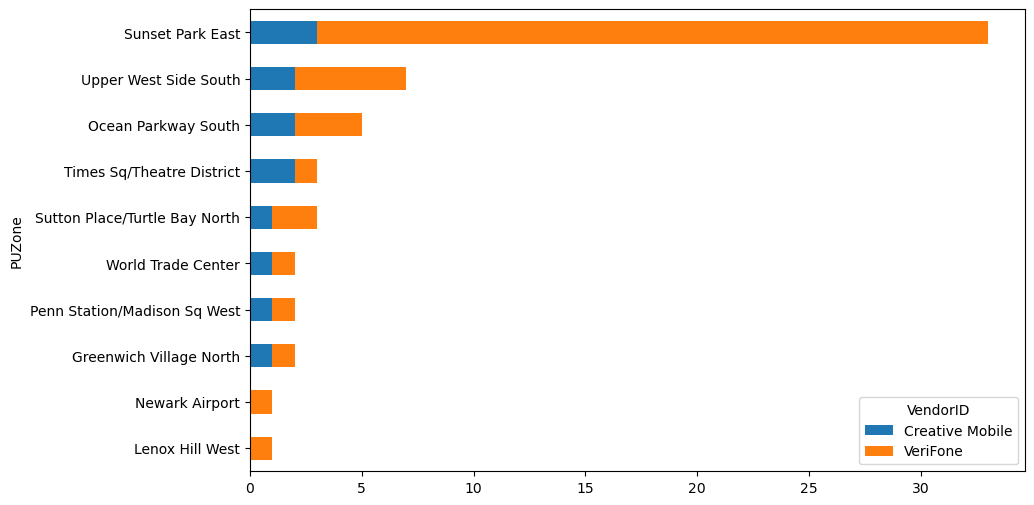

In [351]:
pivot_df = best_tip_zones_trip_count.pivot(index='PUZone', columns='VendorID', values='Trip Count')


pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=True).index]

pivot_df.plot(kind='barh', stacked=True, figsize=(10,6))

#### 8.3 Tip Berdasarkan Trip Distance

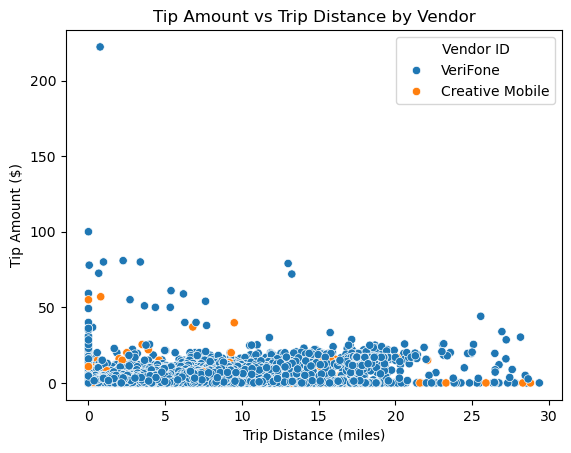

In [352]:
sns.scatterplot(data=df_clean, x='trip_distance', y='tip_amount', hue='VendorID')
plt.title('Tip Amount vs Trip Distance by Vendor')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.legend(title='Vendor ID')
plt.show()

#### 8.4 Tip Berdasarkan Jam

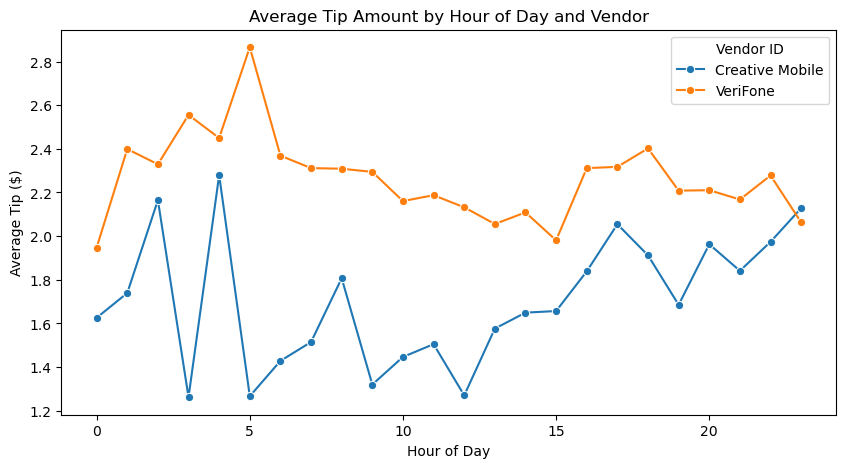

In [353]:
df_clean['pickup_hour'] = pd.to_datetime(df_clean['Pickup_datetime']).dt.hour

hourly_tips = (
    df_clean.groupby(['pickup_hour', 'VendorID'])['tip_amount']
      .mean()
      .reset_index()
)

plt.figure(figsize=(10,5))
sns.lineplot(data=hourly_tips, x='pickup_hour', y='tip_amount', hue='VendorID', marker='o')
plt.title('Average Tip Amount by Hour of Day and Vendor')
plt.xlabel('Hour of Day')
plt.ylabel('Average Tip ($)')
plt.legend(title='Vendor ID')
plt.show()

Insight:
- Ada perbedaan yang signifikan dalam pemberian tip pada kedua Vendor (Mann–Whitney U test, p < 0.05).
- Verifone beroperasi lebih banyak pada daerah yang memberikan tip lebih banyak
- Dengan jarak trip yang relatif sama, vendor VeriFone mendapatkan tip yang lebih banyak
- Pada jam yang sama, VeriFone cenderung mendapatkan tip yang lebih banyak dari pada Creative Mobile.
- VeriFone memiliki rata-rata jarak trip yang lebih banyak, sehingga menyebabkan jumlah tip yang lebih banyak juga


## Kesimpulan


### Rekap Insight

- Di kota New York, vendor dengan trip terbanyak, rata-rata trip terjauh, jumlah passenger per hari didominasi oleh vendor Verifone
- Untuk hari dengan trip terbanyak dan passenger terbanyak terdapat pada hari kerja (Senin-Jumat)
- Untuk jam dengan trip terbanyak terjadi pada jam  10.00 - 18.00
- Untuk Pick Up Zone dengan jumlah trip terbanyak ialah zona East Harlem North dan pada borough Manhattan
- Ada perbedaan yang signifikan pada data pick up dan drop off dari borough Manhattan, Queens, Brooklyn, dengan borough lainnya
- Untuk Drop Off Zone dengan jumlah trip terbanyak ialah zona East Harlem South dan pada borough Manhattan
- Passenger melakukan tipping sebanyak 58% dari total seluruh trip
- Pada jarak trip yang sama, vendor Verifone mendapatkna tip yang lebih besar dari pada Creative Mobile

### Rekomendasi

 #### 1. Rekomedasi Berdasarkan Peak Times dan Peak Zones

- Perbanyak armada pada hari kerja seperti Senin-Jumat dan pada jam kerja seperti jam 10.00 - 18.00
- Alokasikan lebih banyak armada pada borough Manhattan, Queens, dan Brooklyn karena demand yang lebih tinggi
- Vendor Creative Zone dapat menarik seluruh armada dari zona yang sepi dan hanya beroperasi di zona dengan trip terbanyak seperti East Harlem North untuk bersaing dengan vendor VeriFone

#### 2. Rekomedasi Berdasarkan Analisis Tip

- Creative Mobile dapat beroperasi di daerah dengan tip yang lebih banyak
- Training driver Creative Mobile dalam skill sosial dan engagement kepada customer untuk tip yang lebih banyak (perbaikan kualitas customer service)
- Merekomedasikan kepada driver Creative Mobile untuk mengambil orderan dengan jarak trip yang lebih jauh